ANN (Base model)

Epoch 1/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0018 - mae: 0.0255 - mse: 0.0018 - val_loss: 3.0801e-04 - val_mae: 0.0130 - val_mse: 3.0801e-04
Epoch 2/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - loss: 4.1615e-04 - mae: 0.0140 - mse: 4.1615e-04 - val_loss: 3.2262e-04 - val_mae: 0.0125 - val_mse: 3.2262e-04
Epoch 3/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.9028e-04 - mae: 0.0133 - mse: 3.9028e-04 - val_loss: 2.7003e-04 - val_mae: 0.0115 - val_mse: 2.7003e-04
Epoch 4/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 3.2500e-04 - mae: 0.0122 - mse: 3.2500e-04 - val_loss: 2.6489e-04 - val_mae: 0.0114 - val_mse: 2.6489e-04
Epoch 5/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.2504e-04 - mae: 0.0121 - mse: 3.2504e-04 - val_loss: 2.5598e-04 - val_mae: 0.0113 - val_mse: 2.5598e-04
Epoch 6/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0129e-04 - mae: 0.0117 - mse: 3.0129e-04 - val_loss: 2.6143e-04 - val_mae: 0.0113 - val_mse: 2.6143e-04
Epoch 7/

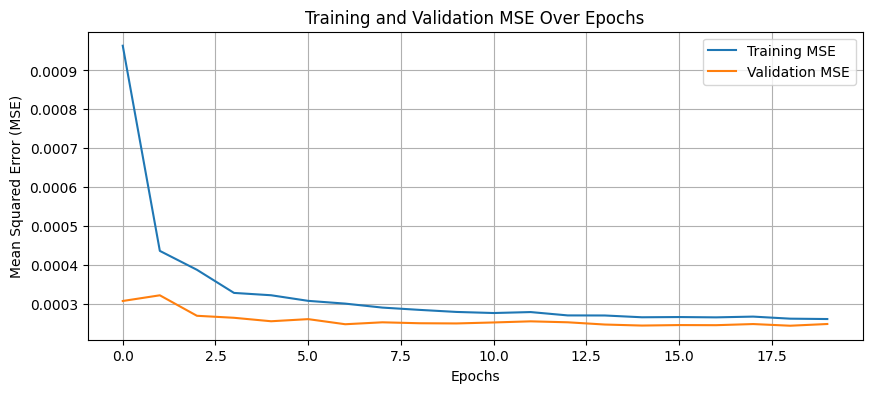

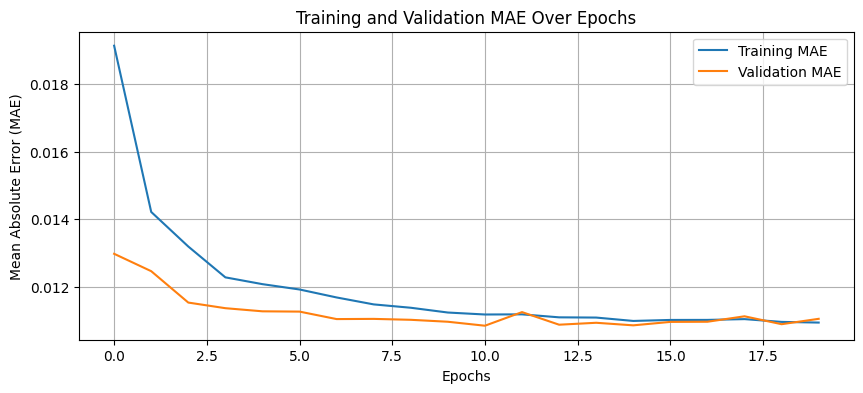

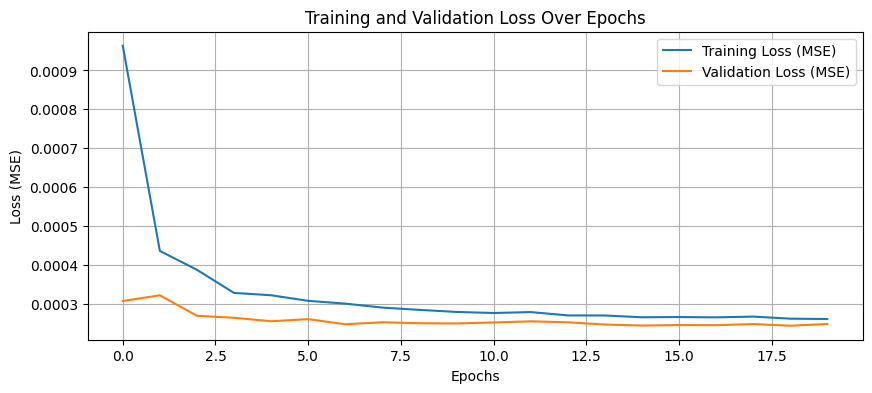

In [1]:
# **Step 1: Import Required Libraries**
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import random


# Set random seeds for reproducibility
seed_value = 42  # Change this if needed
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# **Step 2: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 3: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)  # Ensure selected features & target have values

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:  # Ensure there is enough data
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# **Step 9: Define & Normalize ANN Model**
norm_layer = layers.Normalization()
norm_layer.adapt(X_train_prep)

# **Step 10: Define the ANN Model**
model = keras.Sequential([
    norm_layer,  # Apply normalization
    layers.Dense(64, activation="relu"),  # First hidden layer
    layers.Dense(32, activation="relu"),  # Second hidden layer
    layers.Dense(16, activation="relu"),  # Third hidden layer
    layers.Dense(1)  # Output layer (for regression)
])

# **Step 11: Compile the Model**
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="mse",  # Mean Squared Error for regression
    metrics=["mse", "mae"]  # Track MSE & MAE
)

# **Step 12: Train the Model**
history = model.fit(
    X_train_prep, y_train,
    epochs=20,
    validation_data=(X_test_prep, y_test),
    batch_size=8,
    verbose=1
)

# **Step 13: Evaluate the Model**
test_loss, test_mse, test_mae = model.evaluate(X_test_prep, y_test, verbose=1)

# **Step 14: Compute R² Score**
y_pred = model.predict(X_test_prep)
test_r2 = r2_score(y_test, y_pred)

# **Step 15: Print Evaluation Metrics**
print(f"\nTest Loss (MSE): {test_loss:.6f}")
print(f"Test MSE: {test_mse:.6f}")
print(f"Test MAE: {test_mae:.6f}")
print(f"Test R² Score: {test_r2:.6f}")

# **Step 16: Plot Training & Validation Performance**
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

# **Plot MSE**
plt.figure(figsize=(10, 4))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot MAE**
plt.figure(figsize=(10, 4))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot Loss**
plt.figure(figsize=(10, 4))
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()



ANN testing with different batch sizes 


🔥 Training Model with Batch Size: 6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
✅ Stored results for Batch Size: 6

🔥 Training Model with Batch Size: 8
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
✅ Stored results for Batch Size: 8

🔥 Training Model with Batch Size: 10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
✅ Stored results for Batch Size: 10

🔥 Training Model with Batch Size: 12
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Stored results for Batch Size: 12

🔥 Training Model with Batch Size: 16
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Stored results for Batch Size: 16

🔥 Training Model with Batch Size: 20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
✅ Stored results for Batch Size: 20

🔥 Training Model with Batch Size: 24
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
✅ Stored results for Batch Size: 24

🔥 Training Model with Batch Size: 32
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
✅ Stored results for Batch Size: 32

🔥 Training Model with Batch Size: 40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Stored results 

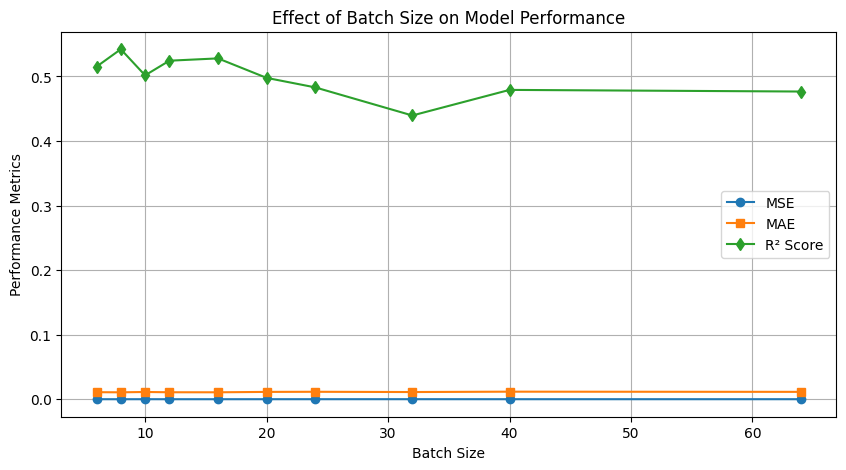

In [2]:
# **Step 1: Import Required Libraries**
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# **Set Random Seeds for Reproducibility**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# **Step 2: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 3: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# **Step 9: Define Function to Create ANN Model**
def create_model():
    norm_layer = layers.Normalization()
    norm_layer.adapt(X_train_prep)
    
    model = keras.Sequential([
        norm_layer,
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Output layer (for regression)
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mse", "mae"])
    
    return model

# **Step 10: Test Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training Model with Batch Size: {batch_size}")
    
    # Create a fresh model for each batch size
    model = create_model()
    
    # Train the model
    history = model.fit(
        X_train_prep, y_train,
        epochs=20,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        verbose=0  # Silent training
    )

    # Evaluate model performance
    test_loss, test_mse, test_mae = model.evaluate(X_test_prep, y_test, verbose=0)

    # Compute R² Score
    y_pred = model.predict(X_test_prep)
    test_r2_final = r2_score(y_test, y_pred)

    # Store results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })
    
    print(f"✅ Stored results for Batch Size: {batch_size}")

# **Step 11: Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print("\n🔥 **ANN Batch Size Results:**")
print(results_df)

# **Step 12: Plot Results**
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on Model Performance")
plt.legend()
plt.grid(True)
plt.show()


 Final one ( fixing validiation split and normalization etc)


Training Model with Batch Size: 6

Training Model with Batch Size: 8

Training Model with Batch Size: 10

Training Model with Batch Size: 12

Training Model with Batch Size: 16

Training Model with Batch Size: 20

Training Model with Batch Size: 24

Training Model with Batch Size: 32

Training Model with Batch Size: 40

Training Model with Batch Size: 64

Selected best batch size (by lowest val_loss): 16

**ANN Final Result (Field, with best batch size):**
{'Batch Size': 16, 'Test MSE': 0.0002763852244243026, 'Test MAE': 0.011572252959012985, 'Test R² Score': 0.47777560065720437}


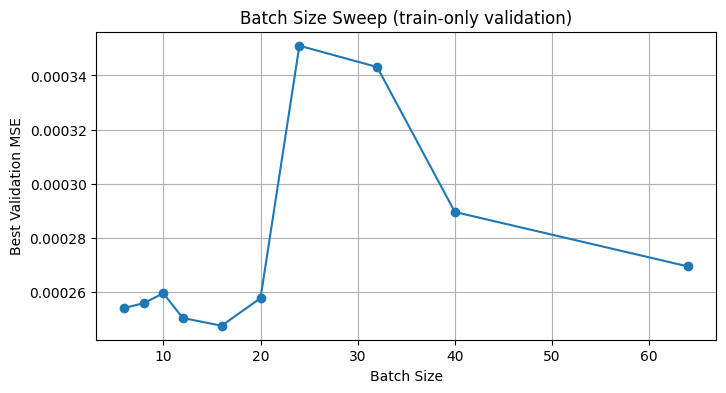

In [2]:
# **Step 1: Import Required Libraries**
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# **Set Random Seeds for Reproducibility**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# **Step 2: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 3: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# **Step 9: Define Function to Create ANN Model**
def create_model():
    # --- REMOVED to avoid double normalization (we already use StandardScaler) ---
    # norm_layer = layers.Normalization()
    # norm_layer.adapt(X_train_prep)

    model = keras.Sequential([
        # norm_layer,
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Output layer (for regression)
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mse", "mae"])
    return model

# **Step 10: Test Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

# Track best batch size by lowest validation loss (train-only)
best_bs = None
best_val = float("inf")

for batch_size in batch_size_options:
    print(f"\nTraining Model with Batch Size: {batch_size}")
    model = create_model()

    # --- CHANGED: use train-only validation to avoid test leakage ---
    history = model.fit(
        X_train_prep, y_train,
        epochs=20,
        validation_split=0.2,   # instead of validation_data=(X_test_prep, y_test)
        batch_size=batch_size,
        verbose=0
    )

    # Track best val_loss for this batch size
    this_best_val = min(history.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best_val})
    if this_best_val < best_val:
        best_val = this_best_val
        best_bs = batch_size

print("\nSelected best batch size (by lowest val_loss):", best_bs)

# ---- Final training with chosen batch size; single evaluation on test ----
final_model = create_model()
final_model.fit(
    X_train_prep, y_train,
    epochs=20,
    validation_split=0.2,   # keep train-only validation for early stopping/monitoring if desired
    batch_size=best_bs,
    verbose=0
)

test_loss, test_mse, test_mae = final_model.evaluate(X_test_prep, y_test, verbose=0)
y_pred = final_model.predict(X_test_prep, verbose=0).ravel()   # flatten for r2_score
test_r2_final = r2_score(y_test, y_pred)

final_result = {
    "Batch Size": best_bs,
    "Test MSE": test_mse,
    "Test MAE": test_mae,
    "Test R² Score": test_r2_final
}
print("\n**ANN Final Result (Field, with best batch size):**")
print(final_result)

# **Step 12: Optional: plot validation losses per batch size**
import pandas as pd
results_df = pd.DataFrame(results)
plt.figure(figsize=(8, 4))
plt.plot(results_df["Batch Size"], results_df["Best Val MSE"], marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Best Validation MSE")
plt.title("Batch Size Sweep (train-only validation)")
plt.grid(True)
plt.show()


ANN (Hyperparameter Tuning)

In [3]:

import keras_tuner as kt
import os
# ✅ Set Random Seed for Consistency
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# Define the hypermodel function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Normalization(input_shape=(X_train_prep.shape[1],)))

    # Tune the number of hidden layers (1 to 4)
    for i in range(hp.Int('n_hidden', 1, 4)):
        model.add(layers.Dense(
            units=hp.Int(f'n_neurons_{i}', min_value=16, max_value=256, step=16),
            activation='relu'
        ))

    # Output layer for regression
    model.add(layers.Dense(1))

    # Tune optimizer and learning rate
    optimizer = hp.Choice('optimizer', ['Adam', 'RMSprop', 'SGD'])
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    if optimizer == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='mse', metrics=['mse', 'mae'])
    return model

# Run Bayesian Optimization
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_mse',
    max_trials=10,  # Try 10 different architectures
    directory='hyperparam_tuning',
    project_name='ANN_Optimization'
)

# Search for the best hyperparameters
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of hidden layers: {best_hps.get('n_hidden')}")
print(f"Best number of neurons per layer: {[best_hps.get(f'n_neurons_{i}') for i in range(best_hps.get('n_hidden'))]}")
print(f"Best optimizer: {best_hps.get('optimizer')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Reloading Tuner from hyperparam_tuning\ANN_Optimization\tuner0.json
Best number of hidden layers: 4
Best number of neurons per layer: [208, 16, 16, 16]
Best optimizer: Adam
Best learning rate: 0.002051386718289359


In [4]:
# ✅ Set Random Seed for Consistency
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ Train the Final Optimized ANN Model with Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training Optimized ANN Model with Batch Size: {batch_size}")

    # ✅ **Rebuild ANN Model with Best Hyperparameters**
    final_ann_model = keras.Sequential()
    final_ann_model.add(layers.Normalization(input_shape=(X_train_prep.shape[1],)))

    # Add Optimized Hidden Layers
    for i in range(best_hps.get('n_hidden')):
        final_ann_model.add(layers.Dense(
            units=best_hps.get(f'n_neurons_{i}'),
            activation='relu'
        ))

    # Output layer
    final_ann_model.add(layers.Dense(1))

    # Compile Model with Best Optimizer & Learning Rate
    if best_hps.get('optimizer') == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate'))
    elif best_hps.get('optimizer') == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=best_hps.get('learning_rate'))
    else:
        opt = keras.optimizers.SGD(learning_rate=best_hps.get('learning_rate'))

    final_ann_model.compile(optimizer=opt, loss="mse", metrics=["mse", "mae"])

    # ✅ Train Model
    history_final_ann = final_ann_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ Evaluate the Model
    test_loss, test_mse, test_mae = final_ann_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ Compute R² Score
    y_pred_final = final_ann_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Convert Results to DataFrame & Display
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **ANN Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")



🔥 Training Optimized ANN Model with Batch Size: 6
Epoch 1/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0011 - mae: 0.0197 - mse: 0.0011 - val_loss: 3.1187e-04 - val_mae: 0.0120 - val_mse: 3.1187e-04
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6899e-04 - mae: 0.0131 - mse: 3.6899e-04 - val_loss: 2.9263e-04 - val_mae: 0.0121 - val_mse: 2.9263e-04
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1228e-04 - mae: 0.0120 - mse: 3.1228e-04 - val_loss: 2.6683e-04 - val_mae: 0.0111 - val_mse: 2.6683e-04
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0478e-04 - mae: 0.0117 - mse: 3.0478e-04 - val_loss: 2.6865e-04 - val_mae: 0.0111 - val_mse: 2.6865e-04
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9863e-04 - mae: 0.0117 - mse: 2.9863e-04 - val_loss: 2.6973e-04 - val_mae: 0.0111 - val_mse: 2.6973e-04
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9451e-04 - mae: 0.0116 - mse: 2.9451e-04 - val_loss: 3.0287e-04 - val_mae: 0.0114 - val_mse: 3.0287e-04
Epoch 7/50
780/780 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4323e-04 - mae: 0.0148 - mse: 4.4323e-04 - val_loss: 2.8611e-04 - val_mae: 0.0123 - val_mse: 2.8611e-04
Epoch 2/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1960e-04 - mae: 0.0125 - mse: 3.1960e-04 - val_loss: 3.0706e-04 - val_mae: 0.0130 - val_mse: 3.0706e-04
Epoch 3/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1046e-04 - mae: 0.0123 - mse: 3.1046e-04 - val_loss: 2.7156e-04 - val_mae: 0.0117 - val_mse: 2.7156e-04
Epoch 4/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.3090e-04 - mae: 0.0127 - mse: 3.3090e-04 - val_loss: 2.7188e-04 - val_mae: 0.0117 - val_mse: 2.7188e-04
Epoch 5/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9564e-04 - mae: 0.0119 - mse: 2.9564e-04 - val_loss: 2.6292e-04 - val_mae: 0.0113 - val_mse: 2.6292e-04
Epoch 6/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8953e-04 - mae: 0.0117 - mse: 2.8953e-04 - val_loss: 2.6269e-04 - val_mae: 0.0114 - val_mse: 2.6269e-04
Epoch 7/50
585/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.2866e-04 - mae: 0.0181 - mse: 8.2866e-04 - val_loss: 2.9398e-04 - val_mae: 0.0116 - val_mse: 2.9398e-04
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.3519e-04 - mae: 0.0127 - mse: 3.3519e-04 - val_loss: 2.9581e-04 - val_mae: 0.0117 - val_mse: 2.9581e-04
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.2447e-04 - mae: 0.0123 - mse: 3.2447e-04 - val_loss: 2.7162e-04 - val_mae: 0.0114 - val_mse: 2.7162e-04
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1827e-04 - mae: 0.0122 - mse: 3.1827e-04 - val_loss: 2.7461e-04 - val_mae: 0.0117 - val_mse: 2.7461e-04
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1652e-04 - mae: 0.0121 - mse: 3.1652e-04 - val_loss: 2.7254e-04 - val_mae: 0.0119 - val_mse: 2.7254e-04
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0970e-04 - mae: 0.0120 - mse: 3.0970e-04 - val_loss: 2.8738e-04 - val_mae: 0.0120 - val_mse: 2.8738e-04
Epoch 7/50
468/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.4859e-04 - mae: 0.0155 - mse: 5.4859e-04 - val_loss: 2.8852e-04 - val_mae: 0.0125 - val_mse: 2.8852e-04
Epoch 2/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1690e-04 - mae: 0.0123 - mse: 3.1690e-04 - val_loss: 3.2721e-04 - val_mae: 0.0130 - val_mse: 3.2721e-04
Epoch 3/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1981e-04 - mae: 0.0124 - mse: 3.1981e-04 - val_loss: 2.8231e-04 - val_mae: 0.0121 - val_mse: 2.8231e-04
Epoch 4/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1008e-04 - mae: 0.0123 - mse: 3.1008e-04 - val_loss: 2.6256e-04 - val_mae: 0.0112 - val_mse: 2.6256e-04
Epoch 5/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9391e-04 - mae: 0.0119 - mse: 2.9391e-04 - val_loss: 2.6130e-04 - val_mae: 0.0112 - val_mse: 2.6130e-04
Epoch 6/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0028e-04 - mae: 0.0120 - mse: 3.0028e-04 - val_loss: 2.6165e-04 - val_mae: 0.0110 - val_mse: 2.6165e-04
Epoch 7/50
390/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - mae: 0.0185 - mse: 0.0010 - val_loss: 2.8511e-04 - val_mae: 0.0120 - val_mse: 2.8511e-04
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0600e-04 - mae: 0.0120 - mse: 3.0600e-04 - val_loss: 2.8527e-04 - val_mae: 0.0124 - val_mse: 2.8527e-04
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9773e-04 - mae: 0.0118 - mse: 2.9773e-04 - val_loss: 2.7151e-04 - val_mae: 0.0115 - val_mse: 2.7151e-04
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9061e-04 - mae: 0.0117 - mse: 2.9061e-04 - val_loss: 2.6108e-04 - val_mae: 0.0111 - val_mse: 2.6108e-04
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8262e-04 - mae: 0.0115 - mse: 2.8262e-04 - val_loss: 2.5878e-04 - val_mae: 0.0111 - val_mse: 2.5878e-04
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8175e-04 - mae: 0.0114 - mse: 2.8175e-04 - val_loss: 2.6043e-04 - val_mae: 0.0114 - val_mse: 2.6043e-04
Epoch 7/50
293/293 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9634e-04 - mae: 0.0168 - mse: 6.9634e-04 - val_loss: 2.8383e-04 - val_mae: 0.0124 - val_mse: 2.8383e-04
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2002e-04 - mae: 0.0123 - mse: 3.2002e-04 - val_loss: 2.7254e-04 - val_mae: 0.0115 - val_mse: 2.7254e-04
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0514e-04 - mae: 0.0119 - mse: 3.0514e-04 - val_loss: 2.5998e-04 - val_mae: 0.0111 - val_mse: 2.5998e-04
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9314e-04 - mae: 0.0118 - mse: 2.9314e-04 - val_loss: 2.6377e-04 - val_mae: 0.0117 - val_mse: 2.6377e-04
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0771e-04 - mae: 0.0120 - mse: 3.0771e-04 - val_loss: 2.6342e-04 - val_mae: 0.0114 - val_mse: 2.6342e-04
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8169e-04 - mae: 0.0113 - mse: 2.8169e-04 - val_loss: 2.5229e-04 - val_mae: 0.0110 - val_mse: 2.5229e-04
Epoch 7/50
234/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2520e-04 - mae: 0.0165 - mse: 6.2520e-04 - val_loss: 2.9471e-04 - val_mae: 0.0128 - val_mse: 2.9471e-04
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1110e-04 - mae: 0.0120 - mse: 3.1110e-04 - val_loss: 2.6906e-04 - val_mae: 0.0118 - val_mse: 2.6906e-04
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9647e-04 - mae: 0.0117 - mse: 2.9647e-04 - val_loss: 2.6375e-04 - val_mae: 0.0114 - val_mse: 2.6375e-04
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9147e-04 - mae: 0.0116 - mse: 2.9147e-04 - val_loss: 2.7220e-04 - val_mae: 0.0120 - val_mse: 2.7220e-04
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8727e-04 - mae: 0.0115 - mse: 2.8727e-04 - val_loss: 2.7237e-04 - val_mae: 0.0119 - val_mse: 2.7237e-04
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9009e-04 - mae: 0.0117 - mse: 2.9009e-04 - val_loss: 2.6496e-04 - val_mae: 0.0114 - val_mse: 2.6496e-04
Epoch 7/50
195/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2806e-04 - mae: 0.0173 - mse: 7.2806e-04 - val_loss: 2.8807e-04 - val_mae: 0.0123 - val_mse: 2.8807e-04
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9531e-04 - mae: 0.0119 - mse: 2.9531e-04 - val_loss: 2.7745e-04 - val_mae: 0.0119 - val_mse: 2.7745e-04
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9527e-04 - mae: 0.0119 - mse: 2.9527e-04 - val_loss: 2.8320e-04 - val_mae: 0.0121 - val_mse: 2.8320e-04
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9264e-04 - mae: 0.0118 - mse: 2.9264e-04 - val_loss: 2.7470e-04 - val_mae: 0.0118 - val_mse: 2.7470e-04
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8737e-04 - mae: 0.0117 - mse: 2.8737e-04 - val_loss: 2.7433e-04 - val_mae: 0.0116 - val_mse: 2.7433e-04
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8114e-04 - mae: 0.0115 - mse: 2.8114e-04 - val_loss: 2.6800e-04 - val_mae: 0.0115 - val_mse: 2.6800e-04
Epoch 7/50
147/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - mae: 0.0298 - mse: 0.0027 - val_loss: 2.9372e-04 - val_mae: 0.0123 - val_mse: 2.9372e-04
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2902e-04 - mae: 0.0124 - mse: 3.2902e-04 - val_loss: 2.7530e-04 - val_mae: 0.0120 - val_mse: 2.7530e-04
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0322e-04 - mae: 0.0120 - mse: 3.0322e-04 - val_loss: 2.8816e-04 - val_mae: 0.0123 - val_mse: 2.8816e-04
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9569e-04 - mae: 0.0118 - mse: 2.9569e-04 - val_loss: 2.6273e-04 - val_mae: 0.0116 - val_mse: 2.6273e-04
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9496e-04 - mae: 0.0118 - mse: 2.9496e-04 - val_loss: 2.7055e-04 - val_mae: 0.0119 - val_mse: 2.7055e-04
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9226e-04 - mae: 0.0117 - mse: 2.9226e-04 - val_loss: 2.5648e-04 - val_mae: 0.0116 - val_mse: 2.5648e-04
Epoch 7/50
117/117 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.1282e-04 - mae: 0.0195 - mse: 9.1282e-04 - val_loss: 2.8893e-04 - val_mae: 0.0114 - val_mse: 2.8893e-04
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0320e-04 - mae: 0.0120 - mse: 3.0320e-04 - val_loss: 2.8354e-04 - val_mae: 0.0112 - val_mse: 2.8354e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9326e-04 - mae: 0.0118 - mse: 2.9326e-04 - val_loss: 2.6516e-04 - val_mae: 0.0112 - val_mse: 2.6516e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8489e-04 - mae: 0.0116 - mse: 2.8489e-04 - val_loss: 2.6966e-04 - val_mae: 0.0109 - val_mse: 2.6966e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8345e-04 - mae: 0.0116 - mse: 2.8345e-04 - val_loss: 2.6494e-04 - val_mae: 0.0110 - val_mse: 2.6494e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7934e-04 - mae: 0.0115 - mse: 2.7934e-04 - val_loss: 2.6237e-04 - val_mae: 0.0107 - val_mse: 2.6237e-04
Epoch 7/50
74/74 ━━━━━━━━━━

Ad hoc -- Manually refined ANN 

Two optimized ANN variants were considered. The first was obtained through Bayesian hyperparameter optimization (Keras Tuner with Bayesian Optimization), which selected a four-layer network (208–16–16–16) with Adam optimizer and a learning rate of 0.00205. In addition, we tested a manually specified ANN (256–176–1 with RMSprop, lr=0.00226), which had been observed in preliminary experiments to yield superior validation performance. Batch-size sensitivity (6–64) was further assessed on this latter configuration to ensure robustness of the training regime


🔥 Training ANN Model with Batch Size: 6
Epoch 1/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0083 - mae: 0.0411 - mse: 0.0083 - val_loss: 2.8257e-04 - val_mae: 0.0111 - val_mse: 2.8257e-04
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0108e-04 - mae: 0.0118 - mse: 3.0108e-04 - val_loss: 2.7667e-04 - val_mae: 0.0111 - val_mse: 2.7667e-04
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8629e-04 - mae: 0.0115 - mse: 2.8629e-04 - val_loss: 2.6842e-04 - val_mae: 0.0110 - val_mse: 2.6842e-04
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8154e-04 - mae: 0.0114 - mse: 2.8154e-04 - val_loss: 2.6534e-04 - val_mae: 0.0110 - val_mse: 2.6534e-04
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7942e-04 - mae: 0.0114 - mse: 2.7942e-04 - val_loss: 2.6422e-04 - val_mae: 0.0110 - val_mse: 2.6422e-04
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7665e-04 - mae: 0.0113 - mse: 2.7665e-04 - val_loss: 2.6107e-04 - val_mae: 

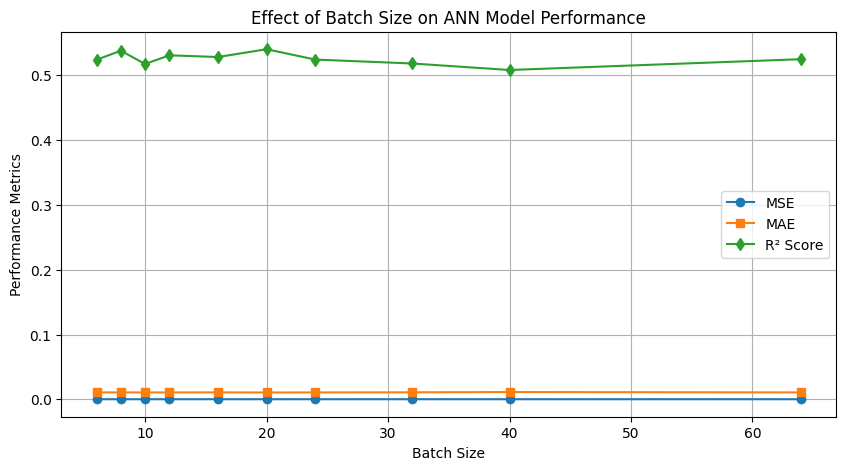

In [5]:
# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import os
import matplotlib.pyplot as plt

# ✅ Step 2: Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"  # Ensures TensorFlow deterministic operations

# **Step 3: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 4: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# ✅ Step 5: Convert Non-Numeric Values to NaN & Drop Missing Data
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(subset=features + [target], inplace=True)

# ✅ Step 6: Split Data into Training and Testing Sets
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ Step 7: Standardize Features
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ Step 8: Convert Data to NumPy Arrays for TensorFlow Compatibility
X_train_prep = np.array(X_train_prep, dtype=np.float32)
X_test_prep = np.array(X_test_prep, dtype=np.float32)

# ✅ Step 9: Create and Adapt Normalization Layer
norm_layer_final = layers.Normalization()
norm_layer_final.adapt(X_train_prep)

# ✅ Step 10: Define Function to Create ANN Model
def create_ann_model():
    model = keras.Sequential([
        norm_layer_final,  # Normalization layer
        layers.Dense(256, activation="relu"),  # First hidden layer
        layers.Dense(176, activation="relu"),  # Second hidden layer
        layers.Dense(1)  # Output layer (regression)
    ])

    model.compile(
        optimizer=RMSprop(learning_rate=0.00226),  # Best optimizer & LR from tuning
        loss="mse",
        metrics=["mse", "mae"]
    )
    
    return model

# ✅ Step 11: Test Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training ANN Model with Batch Size: {batch_size}")

    # Create a fresh model for each batch size
    final_model = create_ann_model()

    # Early stopping callback
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history_final = final_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=1
    )

    # ✅ Step 12: Evaluate Model on Test Data
    test_loss, test_mse, test_mae = final_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ Step 13: Compute R² Score
    y_pred_final = final_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ Step 14: Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })
    
    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Step 15: Convert Results to DataFrame & Display
results_df = pd.DataFrame(results)
print("\n🔥 **ANN Batch Size Results:**")
print(results_df)

# ✅ Step 16: Plot Results
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on ANN Model Performance")
plt.legend()
plt.grid(True)
plt.show()



CNN ( Base model)

Epoch 1/100


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3026e-04 - mae: 0.0201 - mse: 9.3026e-04 - val_loss: 3.1048e-04 - val_mae: 0.0129 - val_mse: 3.1048e-04
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3087e-04 - mae: 0.0130 - mse: 3.3087e-04 - val_loss: 2.7284e-04 - val_mae: 0.0116 - val_mse: 2.7284e-04
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1783e-04 - mae: 0.0125 - mse: 3.1783e-04 - val_loss: 2.6290e-04 - val_mae: 0.0116 - val_mse: 2.6290e-04
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0570e-04 - mae: 0.0123 - mse: 3.0570e-04 - val_loss: 2.7412e-04 - val_mae: 0.0123 - val_mse: 2.7412e-04
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9231e-04 - mae: 0.0119 - mse: 2.9231e-04 - val_loss: 2.5300e-04 - val_mae: 0.0114 - val_mse: 2.5300e-04
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8564e-04 - mae: 0.0117 - mse: 2.8564e-04 - val_loss: 2.5975e-04 - val_mae: 0.0117 - val_mse: 2.5975e-04
Epoch 7/10

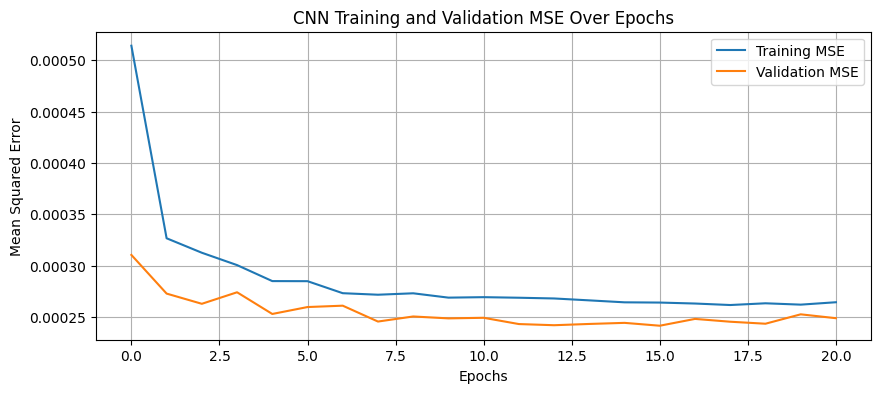

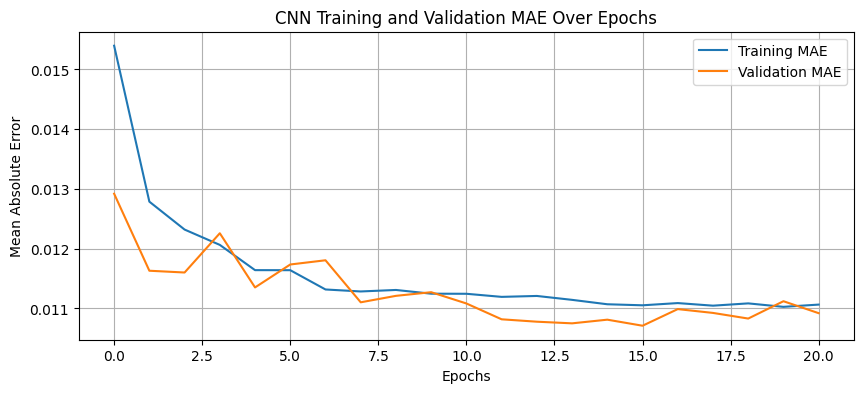

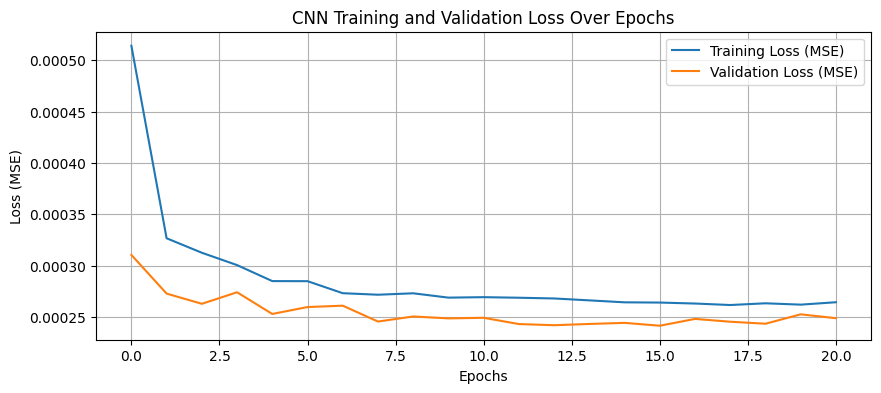

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random


# Set random seeds for reproducibility
seed_value = 42  # Change this if needed
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# **Step 3: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 4: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 5: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 6: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:  # Ensure there is enough data
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 7: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# **Step 8: Reshape Data for CNN (CNN Requires 3D Input)**
X_train_cnn = X_train_prep.reshape((X_train_prep.shape[0], X_train_prep.shape[1], 1))
X_test_cnn = X_test_prep.reshape((X_test_prep.shape[0], X_test_prep.shape[1], 1))

# **Step 9: Define CNN Model**
model_cnn = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train_prep.shape[1], 1)),
    layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])

# **Step 10: Compile the Model**
model_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mse", "mae"]
)

# **Step 11: Train CNN Model**
history_cnn = model_cnn.fit(
    X_train_cnn, y_train,
    epochs=100,
    validation_data=(X_test_cnn, y_test),
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# **Step 12: Evaluate CNN Model**
test_loss_cnn, test_mse_cnn, test_mae_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=1)

# **Step 13: Compute R² Score**
y_pred_cnn = model_cnn.predict(X_test_cnn).flatten()
test_r2_cnn = r2_score(y_test, y_pred_cnn)

# **Step 14: Print CNN Model Evaluation**
print(f"\nCNN Model - Test Loss (MSE): {test_loss_cnn:.6f}")
print(f"CNN Model - Test MSE: {test_mse_cnn:.6f}")
print(f"CNN Model - Test MAE: {test_mae_cnn:.6f}")
print(f"CNN Model - Test R² Score: {test_r2_cnn:.6f}")

# **Step 15: Plot Training History**
import matplotlib.pyplot as plt

history_df_cnn = pd.DataFrame(history_cnn.history)

# **Plot MSE**
plt.figure(figsize=(10, 4))
plt.plot(history_df_cnn['mse'], label='Training MSE')
plt.plot(history_df_cnn['val_mse'], label='Validation MSE')
plt.title('CNN Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# **Plot MAE**
plt.figure(figsize=(10, 4))
plt.plot(history_df_cnn['mae'], label='Training MAE')
plt.plot(history_df_cnn['val_mae'], label='Validation MAE')
plt.title('CNN Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

# **Plot Loss**
plt.figure(figsize=(10, 4))
plt.plot(history_df_cnn['loss'], label='Training Loss (MSE)')
plt.plot(history_df_cnn['val_loss'], label='Validation Loss (MSE)')
plt.title('CNN Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


CNN with batch size testing 

In [9]:
# **Step 1: Import Required Libraries**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# **Set Random Seeds for Reproducibility**
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]
y = df[target]

if X.shape[0] < 2:  
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# **Step 9: Reshape Data for CNN (CNN Requires 3D Input)**
X_train_cnn = X_train_prep.reshape((X_train_prep.shape[0], X_train_prep.shape[1], 1))
X_test_cnn = X_test_prep.reshape((X_test_prep.shape[0], X_test_prep.shape[1], 1))

# **Step 10: Define Function to Create CNN Model**
def create_cnn_model():
    model = keras.Sequential([
        layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train_prep.shape[1], 1)),
        layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)  # Output layer for regression
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="mse",
        metrics=["mse", "mae"]
    )
    
    return model

# **Step 11: Test Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training CNN Model with Batch Size: {batch_size}")

    model_cnn = create_cnn_model()  # Fresh model for each batch size

    history_cnn = model_cnn.fit(
        X_train_cnn, y_train,
        epochs=100,
        validation_data=(X_test_cnn, y_test),
        batch_size=batch_size,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # **Step 12: Evaluate CNN Model**
    test_loss_cnn, test_mse_cnn, test_mae_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=1)

    # **Step 13: Compute R² Score**
    y_pred_cnn = model_cnn.predict(X_test_cnn).flatten()
    test_r2_cnn = r2_score(y_test, y_pred_cnn)

    # **Step 14: Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse_cnn,
        "Test MAE": test_mae_cnn,
        "Test R² Score": test_r2_cnn
    })
    
    print(f"✅ Stored results for Batch Size: {batch_size}")

# **Step 15: Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print("\n🔥 **CNN Batch Size Results:**")
print(results_df)



🔥 Training CNN Model with Batch Size: 6
Epoch 1/100


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.4238e-04 - mae: 0.0186 - mse: 7.4238e-04 - val_loss: 3.3212e-04 - val_mae: 0.0139 - val_mse: 3.3212e-04
Epoch 2/100
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0984e-04 - mae: 0.0123 - mse: 3.0984e-04 - val_loss: 2.7993e-04 - val_mae: 0.0123 - val_mse: 2.7993e-04
Epoch 3/100
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9700e-04 - mae: 0.0119 - mse: 2.9700e-04 - val_loss: 2.6507e-04 - val_mae: 0.0114 - val_mse: 2.6507e-04
Epoch 4/100
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9091e-04 - mae: 0.0117 - mse: 2.9091e-04 - val_loss: 2.6074e-04 - val_mae: 0.0112 - val_mse: 2.6074e-04
Epoch 5/100
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8351e-04 - mae: 0.0115 - mse: 2.8351e-04 - val_loss: 2.5446e-04 - val_mae: 0.0110 - val_mse: 2.5446e-04
Epoch 6/100
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8372e-04 - mae: 0.0115 - mse: 2.8372e-04 - val_loss: 2.5714e-04 - val_mae: 0.0113 - val_mse: 2.5714e-04
Epoch 7/10

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0017 - mae: 0.0220 - mse: 0.0017 - val_loss: 3.5577e-04 - val_mae: 0.0143 - val_mse: 3.5577e-04
Epoch 2/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3843e-04 - mae: 0.0127 - mse: 3.3843e-04 - val_loss: 2.6781e-04 - val_mae: 0.0116 - val_mse: 2.6781e-04
Epoch 3/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0301e-04 - mae: 0.0121 - mse: 3.0301e-04 - val_loss: 2.6155e-04 - val_mae: 0.0113 - val_mse: 2.6155e-04
Epoch 4/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0635e-04 - mae: 0.0120 - mse: 3.0635e-04 - val_loss: 2.6852e-04 - val_mae: 0.0116 - val_mse: 2.6852e-04
Epoch 5/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9320e-04 - mae: 0.0118 - mse: 2.9320e-04 - val_loss: 2.6906e-04 - val_mae: 0.0116 - val_mse: 2.6906e-04
Epoch 6/100
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9498e-04 - mae: 0.0118 - mse: 2.9498e-04 - val_loss: 2.6016e-04 - val_mae: 0.0116 - val_mse: 2.6016e-04
Epoch 7/100
585/58

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0012 - mae: 0.0202 - mse: 0.0012 - val_loss: 2.9912e-04 - val_mae: 0.0129 - val_mse: 2.9912e-04
Epoch 2/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2433e-04 - mae: 0.0123 - mse: 3.2433e-04 - val_loss: 2.8606e-04 - val_mae: 0.0121 - val_mse: 2.8606e-04
Epoch 3/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9919e-04 - mae: 0.0118 - mse: 2.9919e-04 - val_loss: 2.8559e-04 - val_mae: 0.0123 - val_mse: 2.8559e-04
Epoch 4/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0080e-04 - mae: 0.0118 - mse: 3.0080e-04 - val_loss: 2.7447e-04 - val_mae: 0.0123 - val_mse: 2.7447e-04
Epoch 5/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9089e-04 - mae: 0.0116 - mse: 2.9089e-04 - val_loss: 2.6942e-04 - val_mae: 0.0120 - val_mse: 2.6942e-04
Epoch 6/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9451e-04 - mae: 0.0118 - mse: 2.9451e-04 - val_loss: 2.6931e-04 - val_mae: 0.0121 - val_mse: 2.6931e-04
Epoch 7/100
468/46

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.8552e-04 - mae: 0.0196 - mse: 9.8552e-04 - val_loss: 3.8387e-04 - val_mae: 0.0156 - val_mse: 3.8387e-04
Epoch 2/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3597e-04 - mae: 0.0130 - mse: 3.3597e-04 - val_loss: 2.8761e-04 - val_mae: 0.0126 - val_mse: 2.8761e-04
Epoch 3/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0503e-04 - mae: 0.0120 - mse: 3.0503e-04 - val_loss: 2.6168e-04 - val_mae: 0.0117 - val_mse: 2.6168e-04
Epoch 4/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9731e-04 - mae: 0.0118 - mse: 2.9731e-04 - val_loss: 2.5302e-04 - val_mae: 0.0114 - val_mse: 2.5302e-04
Epoch 5/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9339e-04 - mae: 0.0117 - mse: 2.9339e-04 - val_loss: 2.5178e-04 - val_mae: 0.0113 - val_mse: 2.5178e-04
Epoch 6/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8293e-04 - mae: 0.0115 - mse: 2.8293e-04 - val_loss: 2.5059e-04 - val_mae: 0.0111 - val_mse: 2.5059e-04
Epoch 7/10

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.0634e-04 - mae: 0.0188 - mse: 9.0634e-04 - val_loss: 3.1984e-04 - val_mae: 0.0128 - val_mse: 3.1984e-04
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7203e-04 - mae: 0.0135 - mse: 3.7203e-04 - val_loss: 2.6824e-04 - val_mae: 0.0121 - val_mse: 2.6824e-04
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0224e-04 - mae: 0.0121 - mse: 3.0224e-04 - val_loss: 2.5634e-04 - val_mae: 0.0115 - val_mse: 2.5634e-04
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9528e-04 - mae: 0.0117 - mse: 2.9528e-04 - val_loss: 2.5054e-04 - val_mae: 0.0113 - val_mse: 2.5054e-04
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8710e-04 - mae: 0.0116 - mse: 2.8710e-04 - val_loss: 2.4581e-04 - val_mae: 0.0110 - val_mse: 2.4581e-04
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7936e-04 - mae: 0.0115 - mse: 2.7936e-04 - val_loss: 2.5135e-04 - val_mae: 0.0111 - val_mse: 2.5135e-04
Epoch 7/10

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017 - mae: 0.0231 - mse: 0.0017 - val_loss: 2.9836e-04 - val_mae: 0.0131 - val_mse: 2.9836e-04
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5721e-04 - mae: 0.0129 - mse: 3.5721e-04 - val_loss: 2.6059e-04 - val_mae: 0.0118 - val_mse: 2.6059e-04
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0455e-04 - mae: 0.0120 - mse: 3.0455e-04 - val_loss: 2.5005e-04 - val_mae: 0.0111 - val_mse: 2.5005e-04
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9566e-04 - mae: 0.0118 - mse: 2.9566e-04 - val_loss: 2.5058e-04 - val_mae: 0.0111 - val_mse: 2.5058e-04
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9415e-04 - mae: 0.0117 - mse: 2.9415e-04 - val_loss: 2.5762e-04 - val_mae: 0.0114 - val_mse: 2.5762e-04
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9408e-04 - mae: 0.0117 - mse: 2.9408e-04 - val_loss: 2.4796e-04 - val_mae: 0.0111 - val_mse: 2.4796e-04
Epoch 7/100
234/23

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.2147e-04 - mae: 0.0200 - mse: 9.2147e-04 - val_loss: 3.0865e-04 - val_mae: 0.0136 - val_mse: 3.0865e-04
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4641e-04 - mae: 0.0131 - mse: 3.4641e-04 - val_loss: 2.6304e-04 - val_mae: 0.0115 - val_mse: 2.6304e-04
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1100e-04 - mae: 0.0122 - mse: 3.1100e-04 - val_loss: 2.6038e-04 - val_mae: 0.0113 - val_mse: 2.6038e-04
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9537e-04 - mae: 0.0119 - mse: 2.9537e-04 - val_loss: 2.6801e-04 - val_mae: 0.0118 - val_mse: 2.6801e-04
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8559e-04 - mae: 0.0117 - mse: 2.8559e-04 - val_loss: 2.6372e-04 - val_mae: 0.0116 - val_mse: 2.6372e-04
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8972e-04 - mae: 0.0116 - mse: 2.8972e-04 - val_loss: 2.7299e-04 - val_mae: 0.0114 - val_mse: 2.7299e-04
Epoch 7/10

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016 - mae: 0.0266 - mse: 0.0016 - val_loss: 4.3459e-04 - val_mae: 0.0152 - val_mse: 4.3459e-04
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1695e-04 - mae: 0.0145 - mse: 4.1695e-04 - val_loss: 2.9327e-04 - val_mae: 0.0123 - val_mse: 2.9327e-04
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4788e-04 - mae: 0.0133 - mse: 3.4788e-04 - val_loss: 2.9554e-04 - val_mae: 0.0128 - val_mse: 2.9554e-04
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4280e-04 - mae: 0.0130 - mse: 3.4280e-04 - val_loss: 3.1314e-04 - val_mae: 0.0139 - val_mse: 3.1314e-04
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4098e-04 - mae: 0.0130 - mse: 3.4098e-04 - val_loss: 2.7377e-04 - val_mae: 0.0118 - val_mse: 2.7377e-04
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9637e-04 - mae: 0.0120 - mse: 2.9637e-04 - val_loss: 2.6359e-04 - val_mae: 0.0119 - val_mse: 2.6359e-04
Epoch 7/100
147/14

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011 - mae: 0.0202 - mse: 0.0011 - val_loss: 2.8028e-04 - val_mae: 0.0124 - val_mse: 2.8028e-04
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1187e-04 - mae: 0.0123 - mse: 3.1187e-04 - val_loss: 2.6900e-04 - val_mae: 0.0119 - val_mse: 2.6900e-04
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0449e-04 - mae: 0.0122 - mse: 3.0449e-04 - val_loss: 2.6424e-04 - val_mae: 0.0117 - val_mse: 2.6424e-04
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9597e-04 - mae: 0.0121 - mse: 2.9597e-04 - val_loss: 2.6191e-04 - val_mae: 0.0115 - val_mse: 2.6191e-04
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9150e-04 - mae: 0.0119 - mse: 2.9150e-04 - val_loss: 2.5837e-04 - val_mae: 0.0114 - val_mse: 2.5837e-04
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8142e-04 - mae: 0.0117 - mse: 2.8142e-04 - val_loss: 2.5295e-04 - val_mae: 0.0113 - val_mse: 2.5295e-04
Epoch 7/100
117/11

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0021 - mae: 0.0272 - mse: 0.0021 - val_loss: 2.9587e-04 - val_mae: 0.0123 - val_mse: 2.9587e-04
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2441e-04 - mae: 0.0124 - mse: 3.2441e-04 - val_loss: 2.8526e-04 - val_mae: 0.0120 - val_mse: 2.8526e-04
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1437e-04 - mae: 0.0121 - mse: 3.1437e-04 - val_loss: 2.7385e-04 - val_mae: 0.0117 - val_mse: 2.7385e-04
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0212e-04 - mae: 0.0120 - mse: 3.0212e-04 - val_loss: 2.6695e-04 - val_mae: 0.0115 - val_mse: 2.6695e-04
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9905e-04 - mae: 0.0119 - mse: 2.9905e-04 - val_loss: 2.6509e-04 - val_mae: 0.0114 - val_mse: 2.6509e-04
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9236e-04 - mae: 0.0117 - mse: 2.9236e-04 - val_loss: 2.6171e-04 - val_mae: 0.0113 - val_mse: 2.6171e-04
Epoch 7/100
74/74 ━━━━━━━━━━━━

CNN Final one ( fixing validiation split and normalization)

In [3]:
# **Step 1: Import Required Libraries**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import random
import matplotlib.pyplot as plt

# **Set Random Seeds for Reproducibility**
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'

# **Step 4: Ensure Data is Numeric**
df = df.apply(pd.to_numeric, errors='coerce')

# **Step 5: Drop Missing Values**
df.dropna(subset=features + [target], inplace=True)

# **Step 6: Check if Data is Empty**
if df.empty:
    raise ValueError("Dataset is empty after preprocessing! Check the input file or preprocessing steps.")

# **Step 7: Split Data into Train & Test Sets**
X = df[features]; y = df[target]
if X.shape[0] < 2:
    raise ValueError("Not enough samples after preprocessing to split into train and test sets.")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 8: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep  = scaler.transform(X_test)

# **Step 9: Reshape Data for CNN (Samples, Timesteps, Channels)**
# Here we treat "features" as a 1D sequence of length F with 1 channel.
X_train_cnn = X_train_prep.reshape((X_train_prep.shape[0], X_train_prep.shape[1], 1))
X_test_cnn  = X_test_prep.reshape((X_test_prep.shape[0],  X_test_prep.shape[1],  1))

# **Step 10: Define Function to Create CNN Model**
def create_cnn_model():
    model = keras.Sequential([
        layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train_prep.shape[1], 1)),
        layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse", "mae"])
    return model

# **Step 11: Batch-size sweep (train-only validation; no leakage)**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []
best_bs, best_val = None, float("inf")

for batch_size in batch_size_options:
    print(f"\nTraining CNN Model with Batch Size: {batch_size}")
    model_cnn = create_cnn_model()
    history_cnn = model_cnn.fit(
        X_train_cnn, y_train,
        epochs=100,
        validation_split=0.2,  # ← CHANGED: train-only validation (no test leakage)
        batch_size=batch_size,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=0
    )
    this_best_val = min(history_cnn.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best_val})
    if this_best_val < best_val:
        best_val, best_bs = this_best_val, batch_size

print("\nSelected best batch size (by lowest val_loss):", best_bs)

# **Final training with chosen batch size; single test evaluation**
final_cnn = create_cnn_model()
final_cnn.fit(
    X_train_cnn, y_train,
    epochs=100,
    validation_split=0.2,   # keep train-only val for early stopping
    batch_size=best_bs,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=0
)

# **Step 12: Evaluate CNN Model (once)**
test_loss_cnn, test_mse_cnn, test_mae_cnn = final_cnn.evaluate(X_test_cnn, y_test, verbose=0)

# **Step 13: Compute R² Score**
y_pred_cnn = final_cnn.predict(X_test_cnn, verbose=0).ravel()
test_r2_cnn = r2_score(y_test, y_pred_cnn)

print("\n**CNN Final Result (Field, with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse_cnn, "Test MAE": test_mae_cnn, "Test R² Score": test_r2_cnn})

# **Step 15: (Optional) Show validation loss per batch size**
results_df = pd.DataFrame(results)
print("\nCNN Batch Size Sweep (train-only validation):")
print(results_df.sort_values("Batch Size"))



Training CNN Model with Batch Size: 6


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 8


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 10


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 12


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 16


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 24


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 32


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 40


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN Model with Batch Size: 64


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Selected best batch size (by lowest val_loss): 16


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



**CNN Final Result (Field, with best batch size):**
{'Batch Size': 16, 'Test MSE': 0.0002494693617336452, 'Test MAE': 0.011007112450897694, 'Test R² Score': 0.5286325884868349}

CNN Batch Size Sweep (train-only validation):
   Batch Size  Best Val MSE
0           6      0.000245
1           8      0.000247
2          10      0.000253
3          12      0.000250
4          16      0.000244
5          20      0.000254
6          24      0.000266
7          32      0.000250
8          40      0.000257
9          64      0.000252


CNN Hyperparameter Tuning (Bayesian Optimization)

In [10]:
# ✅ **Set Random Seed for Reproducibility**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt
import random
import os

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# ✅ **Drop Missing Values**
df = df.dropna(subset=features + [target])

# ✅ **Convert to NumPy Arrays**
X = df[features].values
y = df[target].values

# ✅ **Split Dataset**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ **Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Reshape for CNN (samples, timesteps, features)**
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], X_train_prep.shape[1], 1))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], X_test_prep.shape[1], 1))

# ✅ **Hyperparameter Tuning Function**
def build_cnn_model(hp):
    model = keras.Sequential()

    # Tune number of Conv1D layers (1 to 3)
    for i in range(hp.Int('n_conv_layers', 1, 3)):
        model.add(layers.Conv1D(
            filters=hp.Int(f'filters_{i}', min_value=16, max_value=128, step=16),
            kernel_size=hp.Int(f'kernel_size_{i}', min_value=2, max_value=5, step=1),
            activation="relu"
        ))
    
    model.add(layers.Flatten())  # Flatten before fully connected layers

    # Fully connected layers
    for i in range(hp.Int('n_dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'dense_units_{i}', min_value=16, max_value=128, step=16),
            activation="relu"
        ))

    # Output layer
    model.add(layers.Dense(1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse",
        metrics=["mse", "mae"]
    )
    return model

# ✅ **Hyperparameter Search with Bayesian Optimization**
tuner = kt.BayesianOptimization(
    build_cnn_model,
    objective='val_mse',
    max_trials=10,
    directory='cnn_tuning',
    project_name='Optimized_CNN'
)

# ✅ **Run the Hyperparameter Search**
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# ✅ **Get Best Hyperparameters**
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Conv1D layers: {best_hps.get('n_conv_layers')}")
print(f"Best Filters per layer: {[best_hps.get(f'filters_{i}') for i in range(best_hps.get('n_conv_layers'))]}")
print(f"Best Kernel Sizes: {[best_hps.get(f'kernel_size_{i}') for i in range(best_hps.get('n_conv_layers'))]}")
print(f"Best Dense layers: {best_hps.get('n_dense_layers')}")
print(f"Best Dense Units per layer: {[best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))]}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# ✅ **Store Best Hyperparameters for Part 2**
best_hyperparameters = {
    'n_conv_layers': best_hps.get('n_conv_layers'),
    'filters': [best_hps.get(f'filters_{i}') for i in range(best_hps.get('n_conv_layers'))],
    'kernel_sizes': [best_hps.get(f'kernel_size_{i}') for i in range(best_hps.get('n_conv_layers'))],
    'n_dense_layers': best_hps.get('n_dense_layers'),
    'dense_units': [best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))],
    'learning_rate': best_hps.get('learning_rate')
}



Reloading Tuner from cnn_tuning\Optimized_CNN\tuner0.json
Best Conv1D layers: 1
Best Filters per layer: [48]
Best Kernel Sizes: [3]
Best Dense layers: 3
Best Dense Units per layer: [128, 64, 16]
Best Learning Rate: 0.0013877861489844856


In [11]:
# ✅ **Set Random Seed for Consistency**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ **Train the Final Optimized CNN Model with Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training CNN Model with Batch Size: {batch_size}")

    # **Rebuild CNN Model with Best Hyperparameters**
    final_cnn_model = keras.Sequential()

    # Add Conv1D layers
    for i in range(best_hyperparameters['n_conv_layers']):
        final_cnn_model.add(layers.Conv1D(
            filters=best_hyperparameters['filters'][i],
            kernel_size=best_hyperparameters['kernel_sizes'][i],
            activation="relu"
        ))
    
    final_cnn_model.add(layers.Flatten())

    # Add Fully Connected Dense Layers
    for i in range(best_hyperparameters['n_dense_layers']):
        final_cnn_model.add(layers.Dense(
            units=best_hyperparameters['dense_units'][i],
            activation='relu'
        ))

    # Output layer
    final_cnn_model.add(layers.Dense(1))

    # Compile Model
    final_cnn_model.compile(
        optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # **Train Model**
    history_final_cnn = final_cnn_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ **Evaluate the Model**
    test_loss, test_mse, test_mae = final_cnn_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ **Compute R² Score**
    y_pred_final = final_cnn_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ **Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print("\n🔥 **CNN Batch Size Results:**")
print(results_df)



🔥 Training CNN Model with Batch Size: 6
Epoch 1/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0012 - mae: 0.0201 - mse: 0.0012 - val_loss: 2.7761e-04 - val_mae: 0.0118 - val_mse: 2.7761e-04
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1559e-04 - mae: 0.0120 - mse: 3.1559e-04 - val_loss: 2.6156e-04 - val_mae: 0.0110 - val_mse: 2.6156e-04
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9777e-04 - mae: 0.0118 - mse: 2.9777e-04 - val_loss: 2.5891e-04 - val_mae: 0.0112 - val_mse: 2.5891e-04
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8416e-04 - mae: 0.0115 - mse: 2.8416e-04 - val_loss: 2.5245e-04 - val_mae: 0.0109 - val_mse: 2.5245e-04
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8858e-04 - mae: 0.0115 - mse: 2.8858e-04 - val_loss: 2.5189e-04 - val_mae: 0.0110 - val_mse: 2.5189e-04
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8296e-04 - mae: 0.0114 - mse: 2.8296e-04 - val_loss: 2.4519e-04 - val_mae: 

LSTM

Optimzed LSTM with batch size testing 

✅ LSTM Input Shape: (4679, 1, 7)

🔥 Training LSTM Model with Batch Size: 6
Epoch 1/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


780/780 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0039 - mae: 0.0384 - mse: 0.0039 - val_loss: 4.6243e-04 - val_mae: 0.0135 - val_mse: 4.6243e-04
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.7218e-04 - mae: 0.0148 - mse: 4.7218e-04 - val_loss: 3.1945e-04 - val_mae: 0.0133 - val_mse: 3.1945e-04
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8172e-04 - mae: 0.0134 - mse: 3.8172e-04 - val_loss: 3.2115e-04 - val_mae: 0.0121 - val_mse: 3.2115e-04
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4570e-04 - mae: 0.0128 - mse: 3.4570e-04 - val_loss: 2.7601e-04 - val_mae: 0.0115 - val_mse: 2.7601e-04
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.2653e-04 - mae: 0.0124 - mse: 3.2653e-04 - val_loss: 2.6547e-04 - val_mae: 0.0114 - val_mse: 2.6547e-04
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1176e-04 - mae: 0.0121 - mse: 3.1176e-04 - val_loss: 2.6730e-04 - val_mae: 0.0113 - val_mse: 2.6730e-04
Epoch 7/50
780/780 ━━━━

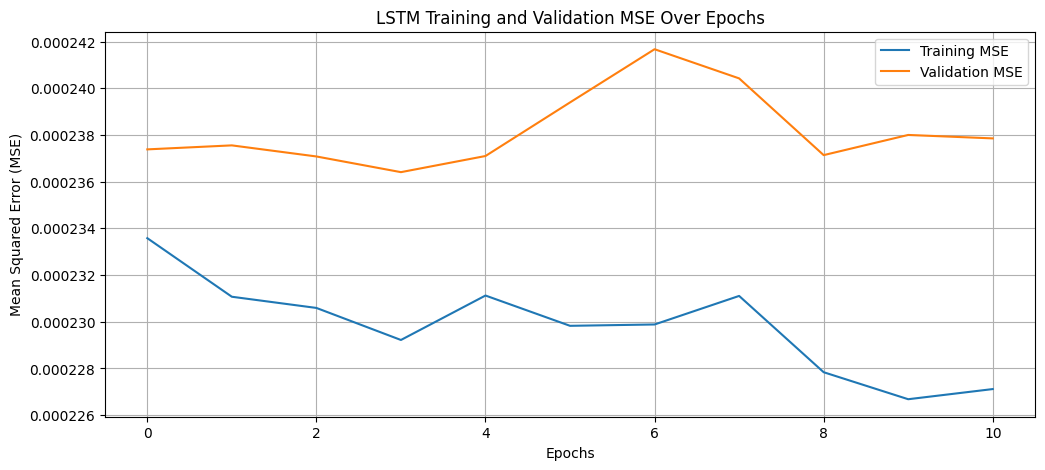

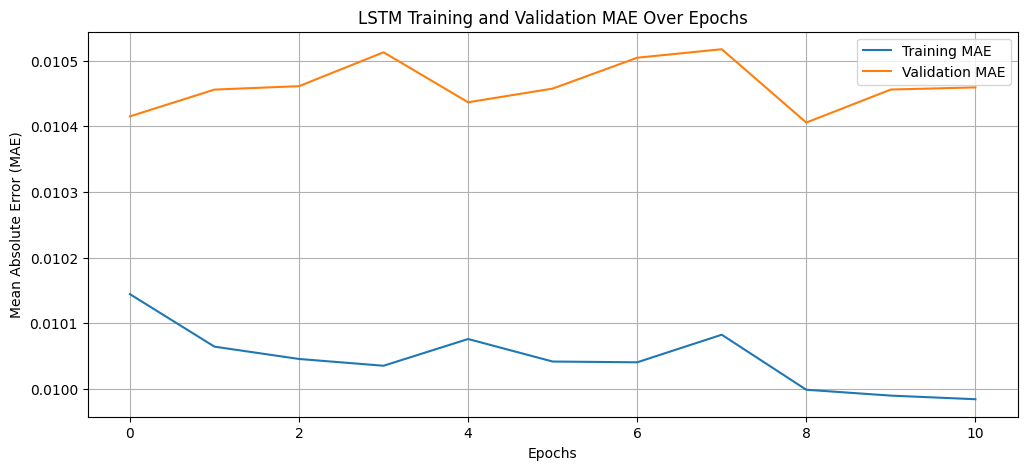

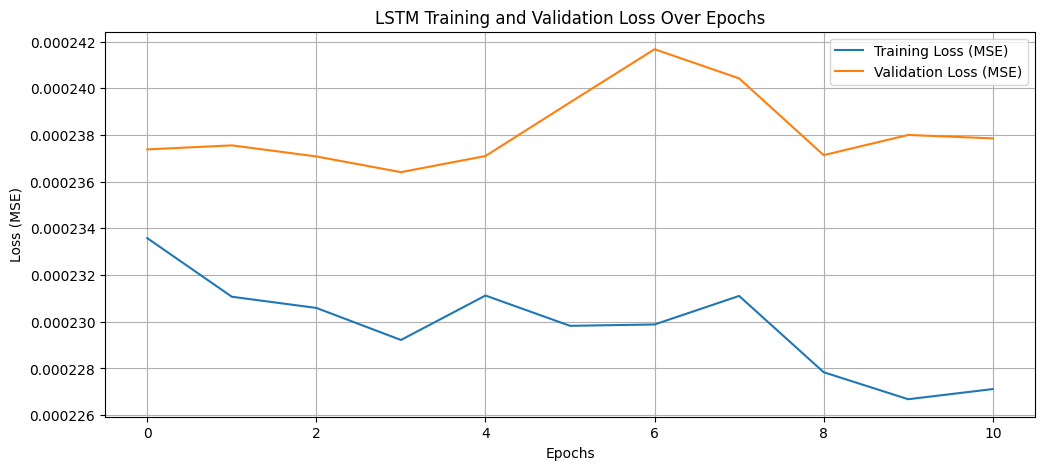

In [43]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

# ✅ Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ Step 1: Load Dataset
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx'  # Update file path
df = pd.read_excel(file_path)

# ✅ Step 2: Define Features & Target
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev', 'Bin_Distance']
target = 'BT_Vel'

# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Train-Test Split
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Reshape Data for LSTM (Samples, Time Steps, Features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print("✅ LSTM Input Shape:", X_train_lstm.shape)  # Expected: (samples, 1, features)

# ✅ Step 3: Define Optimized LSTM Model
lstm_model = keras.Sequential([
    layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='relu', input_shape=(1, X_train_scaled.shape[1]))),
    layers.Bidirectional(layers.LSTM(64, return_sequences=False, activation='relu')),
    layers.LayerNormalization(),  # Improves training stability
    layers.Dropout(0.3),  # Increased dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output
])

# ✅ Step 4: Compile Model
lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Lower LR for smoother convergence
    loss='mse',
    metrics=['mse', 'mae']
)

# ✅ Step 5: Train the Model with Dynamic Batch Size
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]  # Test different batch sizes
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training LSTM Model with Batch Size: {batch_size}")

    history_lstm = lstm_model.fit(
        X_train_lstm, y_train,
        epochs=50,
        validation_data=(X_test_lstm, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
        verbose=1
    )

    # ✅ Step 6: Evaluate Model
    test_loss, test_mse, test_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)

    # ✅ Step 7: Compute R² Score
    y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
    test_r2 = r2_score(y_test, y_pred_lstm)

    # ✅ Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2
    })

    print(f"\n✅ Stored results for Batch Size: {batch_size}")

# ✅ Convert Results to DataFrame & Display
results_df = pd.DataFrame(results)
print("\n🔥 **LSTM Batch Size Results:**")
print(results_df)

# ✅ Step 8: Plot Training Performance
history_df = pd.DataFrame(history_lstm.history)

# **Plot MSE**
plt.figure(figsize=(12, 5))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('LSTM Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot MAE**
plt.figure(figsize=(12, 5))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('LSTM Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot Loss**
plt.figure(figsize=(12, 5))
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['val_loss'], label='Validation Loss (MSE)')
plt.title('LSTM Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


LSTM base model batch size testing

LSTM Input Shape: (4756, 1, 7)

🔥 Training LSTM Model with Batch Size: 6
Epoch 1/50


C:\Users\thtuh\AppData\Local\Temp\ipykernel_30120\377668643.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


793/793 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.3441e-04 - mae: 0.0139 - mse: 4.3441e-04 - val_loss: 3.2989e-04 - val_mae: 0.0125 - val_mse: 3.2989e-04
Epoch 2/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.2433e-04 - mae: 0.0121 - mse: 3.2433e-04 - val_loss: 3.3646e-04 - val_mae: 0.0130 - val_mse: 3.3646e-04
Epoch 3/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.2162e-04 - mae: 0.0121 - mse: 3.2162e-04 - val_loss: 3.2475e-04 - val_mae: 0.0124 - val_mse: 3.2475e-04
Epoch 4/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.1616e-04 - mae: 0.0119 - mse: 3.1616e-04 - val_loss: 3.3044e-04 - val_mae: 0.0127 - val_mse: 3.3044e-04
Epoch 5/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0408e-04 - mae: 0.0117 - mse: 3.0408e-04 - val_loss: 3.2524e-04 - val_mae: 0.0121 - val_mse: 3.2524e-04
Epoch 6/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0007e-04 - mae: 0.0116 - mse: 3.0007e-04 - val_loss: 3.2784e-04 - val_mae: 0.0124 - val_mse: 3.2784e-04
Epoch 7/50
793/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


595/595 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.8402e-04 - mae: 0.0144 - mse: 4.8402e-04 - val_loss: 3.3836e-04 - val_mae: 0.0131 - val_mse: 3.3836e-04
Epoch 2/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2587e-04 - mae: 0.0122 - mse: 3.2587e-04 - val_loss: 3.1916e-04 - val_mae: 0.0120 - val_mse: 3.1916e-04
Epoch 3/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1048e-04 - mae: 0.0119 - mse: 3.1048e-04 - val_loss: 3.2599e-04 - val_mae: 0.0125 - val_mse: 3.2599e-04
Epoch 4/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0782e-04 - mae: 0.0118 - mse: 3.0782e-04 - val_loss: 3.2884e-04 - val_mae: 0.0125 - val_mse: 3.2884e-04
Epoch 5/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0269e-04 - mae: 0.0117 - mse: 3.0269e-04 - val_loss: 3.2964e-04 - val_mae: 0.0124 - val_mse: 3.2964e-04
Epoch 6/50
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0468e-04 - mae: 0.0117 - mse: 3.0468e-04 - val_loss: 3.2777e-04 - val_mae: 0.0125 - val_mse: 3.2777e-04
Epoch 7/50
595/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.6908e-04 - mae: 0.0145 - mse: 4.6908e-04 - val_loss: 3.3726e-04 - val_mae: 0.0128 - val_mse: 3.3726e-04
Epoch 2/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2333e-04 - mae: 0.0122 - mse: 3.2333e-04 - val_loss: 3.2887e-04 - val_mae: 0.0126 - val_mse: 3.2887e-04
Epoch 3/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1247e-04 - mae: 0.0119 - mse: 3.1247e-04 - val_loss: 3.2882e-04 - val_mae: 0.0122 - val_mse: 3.2882e-04
Epoch 4/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0643e-04 - mae: 0.0118 - mse: 3.0643e-04 - val_loss: 3.2897e-04 - val_mae: 0.0124 - val_mse: 3.2897e-04
Epoch 5/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0599e-04 - mae: 0.0118 - mse: 3.0599e-04 - val_loss: 3.2589e-04 - val_mae: 0.0124 - val_mse: 3.2589e-04
Epoch 6/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9933e-04 - mae: 0.0116 - mse: 2.9933e-04 - val_loss: 3.2732e-04 - val_mae: 0.0124 - val_mse: 3.2732e-04
Epoch 7/50
476/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


397/397 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.8996e-04 - mae: 0.0146 - mse: 4.8996e-04 - val_loss: 3.3461e-04 - val_mae: 0.0130 - val_mse: 3.3461e-04
Epoch 2/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2696e-04 - mae: 0.0121 - mse: 3.2696e-04 - val_loss: 3.2553e-04 - val_mae: 0.0121 - val_mse: 3.2553e-04
Epoch 3/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1190e-04 - mae: 0.0118 - mse: 3.1190e-04 - val_loss: 3.2202e-04 - val_mae: 0.0121 - val_mse: 3.2202e-04
Epoch 4/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0718e-04 - mae: 0.0116 - mse: 3.0718e-04 - val_loss: 3.2661e-04 - val_mae: 0.0122 - val_mse: 3.2661e-04
Epoch 5/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0290e-04 - mae: 0.0116 - mse: 3.0290e-04 - val_loss: 3.1956e-04 - val_mae: 0.0119 - val_mse: 3.1956e-04
Epoch 6/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8943e-04 - mae: 0.0114 - mse: 2.8943e-04 - val_loss: 3.1959e-04 - val_mae: 0.0120 - val_mse: 3.1959e-04
Epoch 7/50
397/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.1544e-04 - mae: 0.0137 - mse: 4.1544e-04 - val_loss: 3.3143e-04 - val_mae: 0.0126 - val_mse: 3.3143e-04
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1931e-04 - mae: 0.0121 - mse: 3.1931e-04 - val_loss: 3.2742e-04 - val_mae: 0.0122 - val_mse: 3.2742e-04
Epoch 3/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2399e-04 - mae: 0.0120 - mse: 3.2399e-04 - val_loss: 3.3358e-04 - val_mae: 0.0124 - val_mse: 3.3358e-04
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0765e-04 - mae: 0.0119 - mse: 3.0765e-04 - val_loss: 3.2965e-04 - val_mae: 0.0123 - val_mse: 3.2965e-04
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0211e-04 - mae: 0.0117 - mse: 3.0211e-04 - val_loss: 3.2318e-04 - val_mae: 0.0119 - val_mse: 3.2318e-04
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0458e-04 - mae: 0.0117 - mse: 3.0458e-04 - val_loss: 3.2272e-04 - val_mae: 0.0119 - val_mse: 3.2272e-04
Epoch 7/50
298/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.2033e-04 - mae: 0.0141 - mse: 4.2033e-04 - val_loss: 3.3589e-04 - val_mae: 0.0129 - val_mse: 3.3589e-04
Epoch 2/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3240e-04 - mae: 0.0123 - mse: 3.3240e-04 - val_loss: 3.2747e-04 - val_mae: 0.0123 - val_mse: 3.2747e-04
Epoch 3/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1694e-04 - mae: 0.0119 - mse: 3.1694e-04 - val_loss: 3.2272e-04 - val_mae: 0.0121 - val_mse: 3.2272e-04
Epoch 4/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1184e-04 - mae: 0.0119 - mse: 3.1184e-04 - val_loss: 3.2049e-04 - val_mae: 0.0119 - val_mse: 3.2049e-04
Epoch 5/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0730e-04 - mae: 0.0119 - mse: 3.0730e-04 - val_loss: 3.2090e-04 - val_mae: 0.0120 - val_mse: 3.2090e-04
Epoch 6/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0888e-04 - mae: 0.0119 - mse: 3.0888e-04 - val_loss: 3.1951e-04 - val_mae: 0.0119 - val_mse: 3.1951e-04
Epoch 7/50
238/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.9277e-04 - mae: 0.0150 - mse: 4.9277e-04 - val_loss: 3.2829e-04 - val_mae: 0.0121 - val_mse: 3.2829e-04
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2465e-04 - mae: 0.0121 - mse: 3.2465e-04 - val_loss: 3.1931e-04 - val_mae: 0.0118 - val_mse: 3.1931e-04
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0904e-04 - mae: 0.0117 - mse: 3.0904e-04 - val_loss: 3.1646e-04 - val_mae: 0.0118 - val_mse: 3.1646e-04
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0717e-04 - mae: 0.0117 - mse: 3.0717e-04 - val_loss: 3.1880e-04 - val_mae: 0.0118 - val_mse: 3.1880e-04
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0250e-04 - mae: 0.0115 - mse: 3.0250e-04 - val_loss: 3.1376e-04 - val_mae: 0.0116 - val_mse: 3.1376e-04
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0071e-04 - mae: 0.0114 - mse: 3.0071e-04 - val_loss: 3.1663e-04 - val_mae: 0.0118 - val_mse: 3.1663e-04
Epoch 7/50
199/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.5097e-04 - mae: 0.0158 - mse: 5.5097e-04 - val_loss: 3.2278e-04 - val_mae: 0.0123 - val_mse: 3.2278e-04
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2039e-04 - mae: 0.0121 - mse: 3.2039e-04 - val_loss: 3.1847e-04 - val_mae: 0.0118 - val_mse: 3.1847e-04
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1986e-04 - mae: 0.0121 - mse: 3.1986e-04 - val_loss: 3.1590e-04 - val_mae: 0.0116 - val_mse: 3.1590e-04
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0708e-04 - mae: 0.0118 - mse: 3.0708e-04 - val_loss: 3.1219e-04 - val_mae: 0.0116 - val_mse: 3.1219e-04
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0175e-04 - mae: 0.0117 - mse: 3.0175e-04 - val_loss: 3.1605e-04 - val_mae: 0.0116 - val_mse: 3.1605e-04
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9959e-04 - mae: 0.0116 - mse: 2.9959e-04 - val_loss: 3.1919e-04 - val_mae: 0.0119 - val_mse: 3.1919e-04
Epoch 7/50
149/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.8557e-04 - mae: 0.0164 - mse: 5.8557e-04 - val_loss: 3.2420e-04 - val_mae: 0.0121 - val_mse: 3.2420e-04
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2664e-04 - mae: 0.0122 - mse: 3.2664e-04 - val_loss: 3.2133e-04 - val_mae: 0.0118 - val_mse: 3.2133e-04
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1915e-04 - mae: 0.0119 - mse: 3.1915e-04 - val_loss: 3.1817e-04 - val_mae: 0.0119 - val_mse: 3.1817e-04
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1983e-04 - mae: 0.0120 - mse: 3.1983e-04 - val_loss: 3.1781e-04 - val_mae: 0.0117 - val_mse: 3.1781e-04
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0730e-04 - mae: 0.0117 - mse: 3.0730e-04 - val_loss: 3.1712e-04 - val_mae: 0.0118 - val_mse: 3.1712e-04
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0530e-04 - mae: 0.0116 - mse: 3.0530e-04 - val_loss: 3.1788e-04 - val_mae: 0.0118 - val_mse: 3.1788e-04
Epoch 7/50
119/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.3897e-04 - mae: 0.0146 - mse: 4.3897e-04 - val_loss: 3.3270e-04 - val_mae: 0.0128 - val_mse: 3.3270e-04
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2945e-04 - mae: 0.0123 - mse: 3.2945e-04 - val_loss: 3.2652e-04 - val_mae: 0.0124 - val_mse: 3.2652e-04
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0640e-04 - mae: 0.0119 - mse: 3.0640e-04 - val_loss: 3.2133e-04 - val_mae: 0.0123 - val_mse: 3.2133e-04
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0812e-04 - mae: 0.0119 - mse: 3.0812e-04 - val_loss: 3.2320e-04 - val_mae: 0.0123 - val_mse: 3.2320e-04
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0388e-04 - mae: 0.0118 - mse: 3.0388e-04 - val_loss: 3.1876e-04 - val_mae: 0.0121 - val_mse: 3.1876e-04
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0348e-04 - mae: 0.0118 - mse: 3.0348e-04 - val_loss: 3.2107e-04 - val_mae: 0.0121 - val_mse: 3.2107e-04
Epoch 7/50
75/75 ━━━━━━━━━━

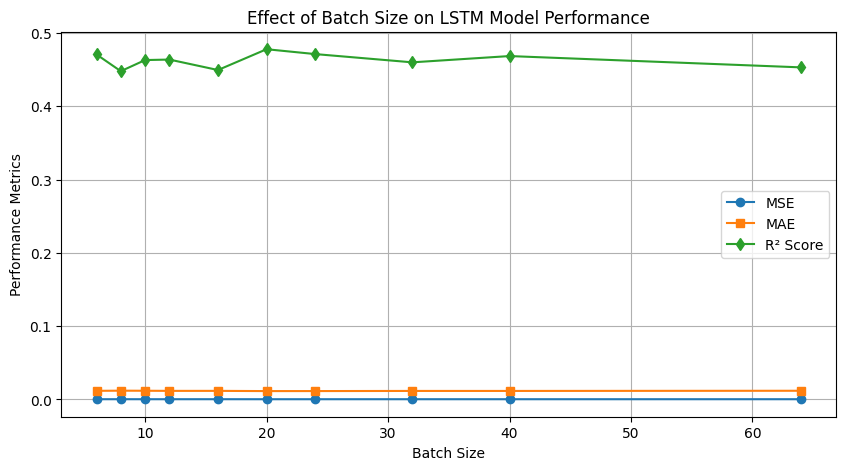

In [7]:
# **Step 1: Import Necessary Libraries**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random

# **Set Random Seeds for Reproducibility**
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

X = df[features]
y = df[target]

# ✅ **Step 4: Handle Missing Values**
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# ✅ **Step 5: Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ **Step 6: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Step 7: Reshape Data for LSTM (Samples, Time Steps, Features)**
X_train_lstm = np.reshape(X_train_prep, (X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_lstm = np.reshape(X_test_prep, (X_test_prep.shape[0], 1, X_test_prep.shape[1]))

print("LSTM Input Shape:", X_train_lstm.shape)  # Expected: (samples, 1, features)

# ✅ **Step 8: Define Function to Create LSTM Model**
def create_lstm_model():
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train_prep.shape[1])),
        layers.LSTM(32, activation='relu', return_sequences=False),
        layers.Dropout(0.2),  # Regularization
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Regression output
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mse', 'mae']
    )
    
    return model

# ✅ **Step 9: Test Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training LSTM Model with Batch Size: {batch_size}")

    # Create a fresh model for each batch size
    lstm_model = create_lstm_model()

    # Early stopping callback
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    # Train the model
    history_lstm = lstm_model.fit(
        X_train_lstm, y_train,
        epochs=50,
        validation_data=(X_test_lstm, y_test),
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=1
    )

    # ✅ **Step 10: Evaluate Model**
    test_loss, test_mse, test_mae = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)

    # Compute R² Score
    y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
    test_r2 = r2_score(y_test, y_pred_lstm)

    # ✅ **Step 11: Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2
    })
    
    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Step 12: Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print("\n🔥 **LSTM Batch Size Results:**")
print(results_df)

# ✅ **Step 13: Plot Results**
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on LSTM Model Performance")
plt.legend()
plt.grid(True)
plt.show()



Final LSTM 

In [5]:
# **Step 1: Import Necessary Libraries**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random

# **Set Random Seeds for Reproducibility**
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'

X = df[features]
y = df[target]

# ✅ **Step 4: Handle Missing Values**
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# ✅ **Step 5: Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ **Step 6: Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep  = scaler.transform(X_test)

# ✅ **Step 7: Reshape Data for LSTM (Samples, Time Steps, Features)**
X_train_lstm = np.reshape(X_train_prep, (X_train_prep.shape[0], 1, X_train_prep.shape[1]))  # same T=1 baseline
X_test_lstm  = np.reshape(X_test_prep,  (X_test_prep.shape[0],  1, X_test_prep.shape[1]))

print("LSTM Input Shape:", X_train_lstm.shape)  # Expected: (samples, 1, features)

# ✅ **Step 8: Define Function to Create LSTM Model**
def create_lstm_model():
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train_prep.shape[1])),
        layers.LSTM(32, activation='relu', return_sequences=False),
        layers.Dropout(0.2),  # Regularization
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Regression output
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse', metrics=['mse', 'mae'])
    return model

# ✅ **Step 9: Batch-size sweep (train-only validation; no leakage)**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []
best_bs, best_val = None, float("inf")

for batch_size in batch_size_options:
    print(f"\nTraining LSTM Model with Batch Size: {batch_size}")
    lstm_model = create_lstm_model()

    early_stopping_cb = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=7, restore_best_weights=True
    )

    history_lstm = lstm_model.fit(
        X_train_lstm, y_train,
        epochs=50,
        validation_split=0.2,            # CHANGED: train-only validation (no test-as-val)
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=0
    )

    # Track best validation MSE for this batch size
    this_best_val = min(history_lstm.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best_val})
    if this_best_val < best_val:
        best_val, best_bs = this_best_val, batch_size

print("\nSelected best batch size (by lowest val_loss):", best_bs)

# ✅ **Final training with chosen batch size; evaluate once on test**
final_lstm = create_lstm_model()
final_lstm.fit(
    X_train_lstm, y_train,
    epochs=50,
    validation_split=0.2,               # keep train-only validation for early stopping
    batch_size=best_bs,
    callbacks=[keras.callbacks.EarlyStopping('val_loss', patience=7, restore_best_weights=True)],
    verbose=0
)

# ✅ **Step 10: Evaluate Model**
test_loss, test_mse, test_mae = final_lstm.evaluate(X_test_lstm, y_test, verbose=0)

# ✅ **Compute R² Score**
y_pred_lstm = final_lstm.predict(X_test_lstm, verbose=0).ravel()
test_r2 = r2_score(y_test, y_pred_lstm)

print("\n**LSTM Final Result (Field, with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse, "Test MAE": test_mae, "Test R² Score": test_r2})

# ✅ **(Optional) Show validation loss vs batch size**
results_df = pd.DataFrame(results).sort_values("Batch Size")
print("\nLSTM Batch Size Sweep (train-only validation):")
print(results_df)


C:\Users\thtuh\AppData\Local\Temp\ipykernel_20124\3621065333.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Input Shape: (4756, 1, 7)

Training LSTM Model with Batch Size: 6

Training LSTM Model with Batch Size: 8


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 10


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 12


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 16


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 24


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 32


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 40


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM Model with Batch Size: 64


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Selected best batch size (by lowest val_loss): 32


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



**LSTM Final Result (Field, with best batch size):**
{'Batch Size': 32, 'Test MSE': 0.0003072647377848625, 'Test MAE': 0.011382298544049263, 'Test R² Score': 0.46833731697735503}

LSTM Batch Size Sweep (train-only validation):
   Batch Size  Best Val MSE
0           6      0.000276
1           8      0.000276
2          10      0.000272
3          12      0.000275
4          16      0.000268
5          20      0.000273
6          24      0.000272
7          32      0.000264
8          40      0.000269
9          64      0.000269


LSTM Bayesian 

In [15]:
# ✅ **Set Random Seed for Reproducibility**
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt
import random
import os

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# ✅ **Drop Missing Values**
df = df.dropna(subset=features + [target])

# ✅ **Convert to NumPy Arrays**
X = df[features].values
y = df[target].values

# ✅ **Split Dataset**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ **Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Reshape for LSTM (samples, time steps, features)**
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))

# ✅ **Hyperparameter Tuning Function**
def build_lstm_model(hp):
    model = keras.Sequential()

    # Tune number of LSTM layers (1 to 3)
    for i in range(hp.Int('n_lstm_layers', 1, 3)):
        model.add(layers.LSTM(
            units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=256, step=32),
            return_sequences=True if i < hp.Int('n_lstm_layers', 1, 3) - 1 else False,
            dropout=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.4, step=0.1)
        ))
    
    # Fully connected layers
    for i in range(hp.Int('n_dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'dense_units_{i}', min_value=16, max_value=128, step=16),
            activation="relu"
        ))

    # Output layer
    model.add(layers.Dense(1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse",
        metrics=["mse", "mae"]
    )
    return model

# ✅ **Hyperparameter Search with Bayesian Optimization**
tuner = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_mse',
    max_trials=10,
    directory='lstm_tuning',
    project_name='Optimized_LSTM'
)

# ✅ **Run the Hyperparameter Search**
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# ✅ **Get Best Hyperparameters**
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best LSTM layers: {best_hps.get('n_lstm_layers')}")
print(f"Best LSTM units per layer: {[best_hps.get(f'lstm_units_{i}') for i in range(best_hps.get('n_lstm_layers'))]}")
print(f"Best Dropout rates: {[best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_lstm_layers'))]}")
print(f"Best Dense layers: {best_hps.get('n_dense_layers')}")
print(f"Best Dense units per layer: {[best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))]}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# ✅ **Store Best Hyperparameters for Part 2**
best_hyperparameters = {
    'n_lstm_layers': best_hps.get('n_lstm_layers'),
    'lstm_units': [best_hps.get(f'lstm_units_{i}') for i in range(best_hps.get('n_lstm_layers'))],
    'dropout_rates': [best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_lstm_layers'))],
    'n_dense_layers': best_hps.get('n_dense_layers'),
    'dense_units': [best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))],
    'learning_rate': best_hps.get('learning_rate')
}


Reloading Tuner from lstm_tuning\Optimized_LSTM\tuner0.json
Best LSTM layers: 1
Best LSTM units per layer: [160]
Best Dropout rates: [0.1]
Best Dense layers: 3
Best Dense units per layer: [64, 16, 48]
Best Learning Rate: 0.00016191837952092902


In [16]:
# ✅ **Set Random Seed for Consistency**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ **Train the Final Optimized LSTM Model with Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training LSTM Model with Batch Size: {batch_size}")

    # **Rebuild LSTM Model with Best Hyperparameters**
    final_lstm_model = keras.Sequential()

    # Add LSTM layers
    for i in range(best_hyperparameters['n_lstm_layers']):
        final_lstm_model.add(layers.LSTM(
            units=best_hyperparameters['lstm_units'][i],
            return_sequences=True if i < best_hyperparameters['n_lstm_layers'] - 1 else False,
            dropout=best_hyperparameters['dropout_rates'][i]
        ))
    
    # Add Fully Connected Dense Layers
    for i in range(best_hyperparameters['n_dense_layers']):
        final_lstm_model.add(layers.Dense(
            units=best_hyperparameters['dense_units'][i],
            activation='relu'
        ))

    # Output layer
    final_lstm_model.add(layers.Dense(1))

    # Compile Model
    final_lstm_model.compile(
        optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # **Train Model**
    history_final_lstm = final_lstm_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ **Evaluate the Model**
    test_loss, test_mse, test_mae = final_lstm_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ **Compute R² Score**
    y_pred_final = final_lstm_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ **Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Convert Results to DataFrame & Display**
results_df = pd.DataFrame(results)
print("\n🔥 **LSTM Batch Size Results:**")
print(results_df)



🔥 Training LSTM Model with Batch Size: 6
Epoch 1/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.4617e-04 - mae: 0.0130 - mse: 3.4617e-04 - val_loss: 2.7985e-04 - val_mae: 0.0116 - val_mse: 2.7985e-04
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0569e-04 - mae: 0.0119 - mse: 3.0569e-04 - val_loss: 2.7489e-04 - val_mae: 0.0117 - val_mse: 2.7489e-04
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9655e-04 - mae: 0.0118 - mse: 2.9655e-04 - val_loss: 2.6566e-04 - val_mae: 0.0114 - val_mse: 2.6566e-04
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9005e-04 - mae: 0.0115 - mse: 2.9005e-04 - val_loss: 2.6050e-04 - val_mae: 0.0112 - val_mse: 2.6050e-04
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8486e-04 - mae: 0.0115 - mse: 2.8486e-04 - val_loss: 2.6133e-04 - val_mae: 0.0112 - val_mse: 2.6133e-04
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8666e-04 - mae: 0.0116 - mse: 2.8666e-04 - val_loss: 2.6313e-04 - 

GRU

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 64)          │        14,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_272 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_273 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,969 (93.63 KB)

 Trainable params: 23,969 (93.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.9352e-04 - mae: 0.0150 - mse: 4.9352e-04 - val_loss: 2.8233e-04 - val_mae: 0.0122 - val_mse: 2.8233e-04
Epoch 2/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0700e-04 - mae: 0.0121 - mse: 3.0700e-04 - val_loss: 2.7032e-04 - val_mae: 0.0118 - val_mse: 2.7032e-04
Epoch 3/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9893e-04 - mae: 0.0119 - mse: 2.9893e-04 - val_loss: 2.6740e-04 - val_mae: 0.0118 - val_mse: 2.6740e-04
Epoch 4/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9227e-04 - mae: 0.0118 - mse: 2.9227e-04 - val_loss: 2.5912e-04 - val_mae: 0.0113 - val_mse: 2.5912e-04
Epoch 5/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8915e-04 - mae: 0.0117 - mse: 2.8915e-04 - val_loss: 2.6479e-04 - val_mae: 0.0116 - val_mse: 2.6479e-04
Epoch 6/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8713e-04 - mae: 0.0117 - mse: 2.8713e-04 - val_loss: 2.5705e-04 - val_mae: 0.0114 - val_mse: 2.5705e-04
Epoc

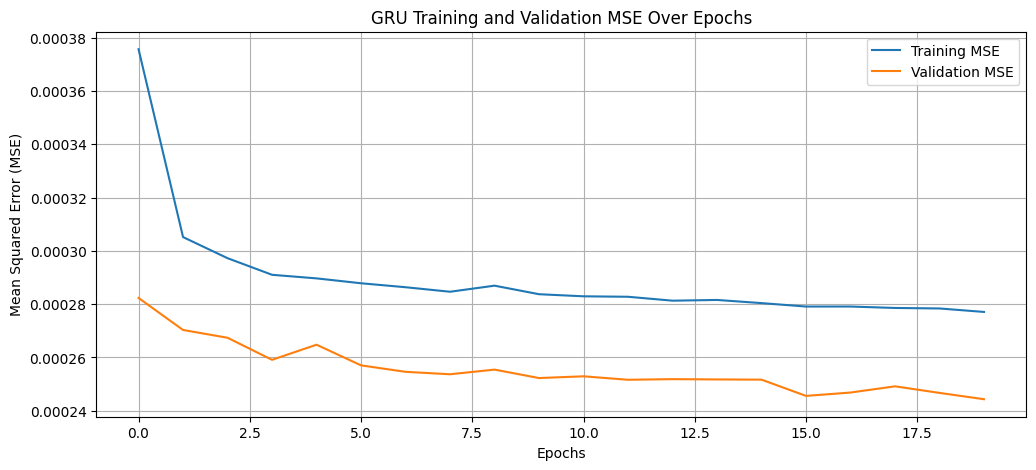

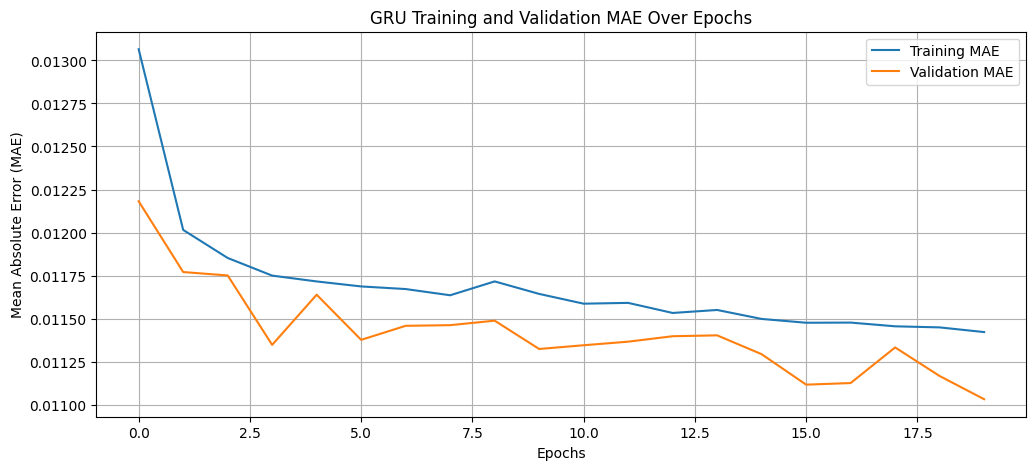

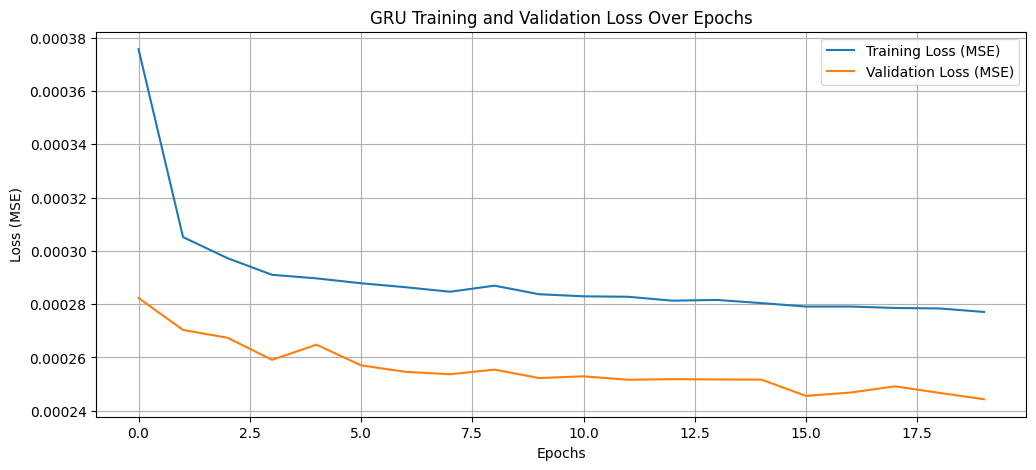

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import random
import os

#  Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"  # Ensures TensorFlow deterministic operations

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# Drop missing values
df = df.dropna(subset=features + [target])

# Convert to NumPy arrays
X = df[features].values
y = df[target].values.reshape(-1, 1)  # Reshape for compatibility

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Standardize features
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# Reshape for GRU (samples, time steps, features)
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))
# Build the GRU model
gru_model = keras.Sequential([
    layers.GRU(64, return_sequences=True, input_shape=(X_train_prep.shape[1], X_train_prep.shape[2])),
    layers.GRU(32, return_sequences=False),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
gru_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0037),
    loss="mse",
    metrics=["mse", "mae"]
)

# Model summary
gru_model.summary()
# Train the GRU model
history_gru = gru_model.fit(
    X_train_prep, y_train,
    epochs=20,  # Adjust epochs based on validation performance
    validation_data=(X_test_prep, y_test),
    batch_size=16,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)
# Evaluate the model on the test set
test_loss, test_mse, test_mae = gru_model.evaluate(X_test_prep, y_test, verbose=1)

# Compute R² Score
y_pred = gru_model.predict(X_test_prep)
test_r2 = r2_score(y_test, y_pred)

# Print results
print(f"GRU Model - Test Loss (MSE): {test_loss:.6f}")
print(f"GRU Model - Test MSE: {test_mse:.6f}")
print(f"GRU Model - Test MAE: {test_mae:.6f}")
print(f"GRU Model - Test R² Score: {test_r2:.6f}")
# Convert history to DataFrame
history_df = pd.DataFrame(history_gru.history)

# Plot MSE
plt.figure(figsize=(12, 5))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('GRU Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot MAE
plt.figure(figsize=(12, 5))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('GRU Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(12, 5))
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['val_loss'], label='Validation Loss (MSE)')
plt.title('GRU Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


 GRU batch size testing


🔥 Training GRU Model with Batch Size: 6
Epoch 1/20


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


780/780 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.5999e-04 - mae: 0.0143 - mse: 4.5999e-04 - val_loss: 2.8004e-04 - val_mae: 0.0116 - val_mse: 2.8004e-04
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0756e-04 - mae: 0.0121 - mse: 3.0756e-04 - val_loss: 2.7589e-04 - val_mae: 0.0115 - val_mse: 2.7589e-04
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0504e-04 - mae: 0.0120 - mse: 3.0504e-04 - val_loss: 2.6767e-04 - val_mae: 0.0113 - val_mse: 2.6767e-04
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0238e-04 - mae: 0.0120 - mse: 3.0238e-04 - val_loss: 2.6580e-04 - val_mae: 0.0113 - val_mse: 2.6580e-04
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0020e-04 - mae: 0.0119 - mse: 3.0020e-04 - val_loss: 2.6423e-04 - val_mae: 0.0114 - val_mse: 2.6423e-04
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9783e-04 - mae: 0.0119 - mse: 2.9783e-04 - val_loss: 2.5937e-04 - val_mae: 0.0114 - val_mse: 2.5937e-04
Epoch 7/20
780/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.0992e-04 - mae: 0.0151 - mse: 5.0992e-04 - val_loss: 2.7408e-04 - val_mae: 0.0112 - val_mse: 2.7408e-04
Epoch 2/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0801e-04 - mae: 0.0120 - mse: 3.0801e-04 - val_loss: 2.7278e-04 - val_mae: 0.0115 - val_mse: 2.7278e-04
Epoch 3/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0421e-04 - mae: 0.0120 - mse: 3.0421e-04 - val_loss: 2.7726e-04 - val_mae: 0.0117 - val_mse: 2.7726e-04
Epoch 4/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0627e-04 - mae: 0.0120 - mse: 3.0627e-04 - val_loss: 2.7589e-04 - val_mae: 0.0119 - val_mse: 2.7589e-04
Epoch 5/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9952e-04 - mae: 0.0119 - mse: 2.9952e-04 - val_loss: 2.6872e-04 - val_mae: 0.0117 - val_mse: 2.6872e-04
Epoch 6/20
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9768e-04 - mae: 0.0119 - mse: 2.9768e-04 - val_loss: 2.5928e-04 - val_mae: 0.0113 - val_mse: 2.5928e-04
Epoch 7/20
585/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.6060e-04 - mae: 0.0161 - mse: 6.6060e-04 - val_loss: 2.8310e-04 - val_mae: 0.0120 - val_mse: 2.8310e-04
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0085e-04 - mae: 0.0120 - mse: 3.0085e-04 - val_loss: 2.7456e-04 - val_mae: 0.0116 - val_mse: 2.7456e-04
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9891e-04 - mae: 0.0119 - mse: 2.9891e-04 - val_loss: 2.6862e-04 - val_mae: 0.0114 - val_mse: 2.6862e-04
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0005e-04 - mae: 0.0120 - mse: 3.0005e-04 - val_loss: 2.6401e-04 - val_mae: 0.0112 - val_mse: 2.6401e-04
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9781e-04 - mae: 0.0119 - mse: 2.9781e-04 - val_loss: 2.6211e-04 - val_mae: 0.0113 - val_mse: 2.6211e-04
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9660e-04 - mae: 0.0119 - mse: 2.9660e-04 - val_loss: 2.6643e-04 - val_mae: 0.0111 - val_mse: 2.6643e-04
Epoch 7/20
468/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.2797e-04 - mae: 0.0178 - mse: 7.2797e-04 - val_loss: 2.8021e-04 - val_mae: 0.0121 - val_mse: 2.8021e-04
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2770e-04 - mae: 0.0125 - mse: 3.2770e-04 - val_loss: 2.7253e-04 - val_mae: 0.0114 - val_mse: 2.7253e-04
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3098e-04 - mae: 0.0124 - mse: 3.3098e-04 - val_loss: 2.6928e-04 - val_mae: 0.0113 - val_mse: 2.6928e-04
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0713e-04 - mae: 0.0121 - mse: 3.0713e-04 - val_loss: 2.7493e-04 - val_mae: 0.0114 - val_mse: 2.7493e-04
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0008e-04 - mae: 0.0120 - mse: 3.0008e-04 - val_loss: 2.6692e-04 - val_mae: 0.0113 - val_mse: 2.6692e-04
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9535e-04 - mae: 0.0119 - mse: 2.9535e-04 - val_loss: 2.6683e-04 - val_mae: 0.0117 - val_mse: 2.6683e-04
Epoch 7/20
390/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.2337e-04 - mae: 0.0170 - mse: 6.2337e-04 - val_loss: 3.1261e-04 - val_mae: 0.0125 - val_mse: 3.1261e-04
Epoch 2/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3429e-04 - mae: 0.0128 - mse: 3.3429e-04 - val_loss: 2.9780e-04 - val_mae: 0.0122 - val_mse: 2.9780e-04
Epoch 3/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1118e-04 - mae: 0.0122 - mse: 3.1118e-04 - val_loss: 2.8874e-04 - val_mae: 0.0120 - val_mse: 2.8874e-04
Epoch 4/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0380e-04 - mae: 0.0119 - mse: 3.0380e-04 - val_loss: 2.6276e-04 - val_mae: 0.0113 - val_mse: 2.6276e-04
Epoch 5/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9655e-04 - mae: 0.0117 - mse: 2.9655e-04 - val_loss: 2.6257e-04 - val_mae: 0.0115 - val_mse: 2.6257e-04
Epoch 6/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9496e-04 - mae: 0.0117 - mse: 2.9496e-04 - val_loss: 2.6001e-04 - val_mae: 0.0112 - val_mse: 2.6001e-04
Epoch 7/20
293/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.2546e-04 - mae: 0.0171 - mse: 7.2546e-04 - val_loss: 3.1553e-04 - val_mae: 0.0135 - val_mse: 3.1553e-04
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1194e-04 - mae: 0.0124 - mse: 3.1194e-04 - val_loss: 2.6662e-04 - val_mae: 0.0117 - val_mse: 2.6662e-04
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9522e-04 - mae: 0.0120 - mse: 2.9522e-04 - val_loss: 2.5537e-04 - val_mae: 0.0113 - val_mse: 2.5537e-04
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9216e-04 - mae: 0.0118 - mse: 2.9216e-04 - val_loss: 2.5137e-04 - val_mae: 0.0112 - val_mse: 2.5137e-04
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9092e-04 - mae: 0.0117 - mse: 2.9092e-04 - val_loss: 2.5414e-04 - val_mae: 0.0116 - val_mse: 2.5414e-04
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8606e-04 - mae: 0.0116 - mse: 2.8606e-04 - val_loss: 2.4705e-04 - val_mae: 0.0111 - val_mse: 2.4705e-04
Epoch 7/20
234/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.8335e-04 - mae: 0.0181 - mse: 6.8335e-04 - val_loss: 3.0559e-04 - val_mae: 0.0127 - val_mse: 3.0559e-04
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2189e-04 - mae: 0.0124 - mse: 3.2189e-04 - val_loss: 2.5880e-04 - val_mae: 0.0112 - val_mse: 2.5880e-04
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0267e-04 - mae: 0.0119 - mse: 3.0267e-04 - val_loss: 2.5565e-04 - val_mae: 0.0114 - val_mse: 2.5565e-04
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9327e-04 - mae: 0.0117 - mse: 2.9327e-04 - val_loss: 2.5456e-04 - val_mae: 0.0113 - val_mse: 2.5456e-04
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8913e-04 - mae: 0.0117 - mse: 2.8913e-04 - val_loss: 2.5305e-04 - val_mae: 0.0114 - val_mse: 2.5305e-04
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8606e-04 - mae: 0.0116 - mse: 2.8606e-04 - val_loss: 2.5608e-04 - val_mae: 0.0116 - val_mse: 2.5608e-04
Epoch 7/20
195/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0013 - mae: 0.0223 - mse: 0.0013 - val_loss: 2.9033e-04 - val_mae: 0.0115 - val_mse: 2.9033e-04
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3065e-04 - mae: 0.0126 - mse: 3.3065e-04 - val_loss: 2.8178e-04 - val_mae: 0.0120 - val_mse: 2.8178e-04
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1312e-04 - mae: 0.0122 - mse: 3.1312e-04 - val_loss: 2.6590e-04 - val_mae: 0.0116 - val_mse: 2.6590e-04
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0001e-04 - mae: 0.0119 - mse: 3.0001e-04 - val_loss: 2.6103e-04 - val_mae: 0.0112 - val_mse: 2.6103e-04
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0258e-04 - mae: 0.0118 - mse: 3.0258e-04 - val_loss: 2.5652e-04 - val_mae: 0.0110 - val_mse: 2.5652e-04
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8944e-04 - mae: 0.0115 - mse: 2.8944e-04 - val_loss: 2.5952e-04 - val_mae: 0.0113 - val_mse: 2.5952e-04
Epoch 7/20
147/147 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7.3261e-04 - mae: 0.0179 - mse: 7.3261e-04 - val_loss: 2.8962e-04 - val_mae: 0.0121 - val_mse: 2.8962e-04
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3090e-04 - mae: 0.0127 - mse: 3.3090e-04 - val_loss: 2.7030e-04 - val_mae: 0.0119 - val_mse: 2.7030e-04
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1148e-04 - mae: 0.0122 - mse: 3.1148e-04 - val_loss: 2.5740e-04 - val_mae: 0.0114 - val_mse: 2.5740e-04
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9252e-04 - mae: 0.0117 - mse: 2.9252e-04 - val_loss: 2.5912e-04 - val_mae: 0.0116 - val_mse: 2.5912e-04
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8598e-04 - mae: 0.0116 - mse: 2.8598e-04 - val_loss: 2.6695e-04 - val_mae: 0.0117 - val_mse: 2.6695e-04
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8807e-04 - mae: 0.0116 - mse: 2.8807e-04 - val_loss: 2.5843e-04 - val_mae: 0.0115 - val_mse: 2.5843e-04
Epoch 7/20
117/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6.4506e-04 - mae: 0.0169 - mse: 6.4506e-04 - val_loss: 2.8345e-04 - val_mae: 0.0118 - val_mse: 2.8345e-04
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1738e-04 - mae: 0.0121 - mse: 3.1738e-04 - val_loss: 2.7758e-04 - val_mae: 0.0118 - val_mse: 2.7758e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9516e-04 - mae: 0.0117 - mse: 2.9516e-04 - val_loss: 2.6984e-04 - val_mae: 0.0115 - val_mse: 2.6984e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0040e-04 - mae: 0.0117 - mse: 3.0040e-04 - val_loss: 2.7474e-04 - val_mae: 0.0120 - val_mse: 2.7474e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8967e-04 - mae: 0.0117 - mse: 2.8967e-04 - val_loss: 2.6326e-04 - val_mae: 0.0115 - val_mse: 2.6326e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7969e-04 - mae: 0.0114 - mse: 2.7969e-04 - val_loss: 2.5895e-04 - val_mae: 0.0113 - val_mse: 2.5895e-04
Epoch 7/20
74/74 ━━━━━━━━━━

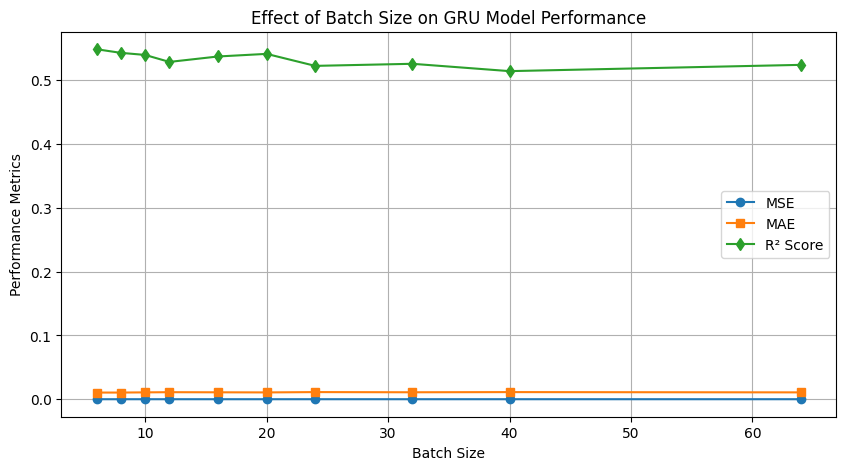

In [18]:
# ✅ Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import random
import os

# ✅ Step 2: Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"  # Ensures TensorFlow deterministic operations

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# ✅ Step 5: Drop Missing Values
df = df.dropna(subset=features + [target])

# ✅ Step 6: Convert to NumPy Arrays
X = df[features].values
y = df[target].values.reshape(-1, 1)  # Reshape for compatibility

# ✅ Step 7: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# ✅ Step 8: Standardize Features
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ Step 9: Reshape for GRU (samples, time steps, features)
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))

# ✅ Step 10: Define Function to Create GRU Model
def create_gru_model():
    model = keras.Sequential([
        layers.GRU(64, return_sequences=True, input_shape=(X_train_prep.shape[1], X_train_prep.shape[2])),
        layers.GRU(32, return_sequences=False),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Output layer for regression
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0037),
        loss="mse",
        metrics=["mse", "mae"]
    )

    return model

# ✅ Step 11: Test Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training GRU Model with Batch Size: {batch_size}")

    # Create a fresh model for each batch size
    gru_model = create_gru_model()

    # Early stopping callback
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history_gru = gru_model.fit(
        X_train_prep, y_train,
        epochs=20,  # Adjust epochs based on validation performance
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=1
    )

    # ✅ Step 12: Evaluate Model on Test Data
    test_loss, test_mse, test_mae = gru_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ Step 13: Compute R² Score
    y_pred = gru_model.predict(X_test_prep)
    test_r2 = r2_score(y_test, y_pred)

    # ✅ Step 14: Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Step 15: Convert Results to DataFrame & Display
results_df = pd.DataFrame(results)
print("\n🔥 **GRU Batch Size Results:**")
print(results_df)

# ✅ Step 16: Plot Results
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on GRU Model Performance")
plt.legend()
plt.grid(True)
plt.show()


GRU Final one 


Training GRU Model with Batch Size: 6


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training GRU Model with Batch Size: 8

Training GRU Model with Batch Size: 10

Training GRU Model with Batch Size: 12

Training GRU Model with Batch Size: 16

Training GRU Model with Batch Size: 20

Training GRU Model with Batch Size: 24

Training GRU Model with Batch Size: 32

Training GRU Model with Batch Size: 40

Training GRU Model with Batch Size: 64

Selected best batch size (by lowest val_loss): 40

**GRU Final Result (with best batch size):**
{'Batch Size': 40, 'Test MSE': 0.00026111758779734373, 'Test MAE': 0.010988153517246246, 'Test R² Score': 0.5066235101712027}

GRU Batch Size Sweep (train-only validation):
   Batch Size  Best Val MSE
0           6      0.000255
1           8      0.000256
2          10      0.000255
3          12      0.000263
4          16      0.000265
5          20      0.000266
6          24      0.000260
7          32      0.000262
8          40      0.000254
9          64      0.000254


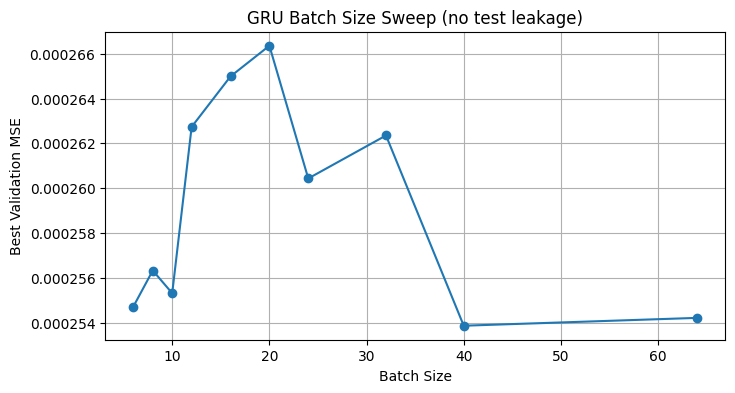

In [6]:
# ✅ Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import random
import os

# ✅ Step 2: Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'

# ✅ Step 5: Drop Missing Values
df = df.dropna(subset=features + [target])

# ✅ Step 6: Convert to NumPy Arrays
X = df[features].values
y = df[target].values.reshape(-1, 1)  # keep as column vector for now

# ✅ Step 7: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# ✅ Step 8: Standardize Features
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep  = scaler.transform(X_test)

# ✅ Step 9: Reshape for GRU (samples, time steps, features)
X_train_gru = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_gru  = X_test_prep.reshape((X_test_prep.shape[0],  1, X_test_prep.shape[1]))

# ✅ Step 10: Define Function to Create GRU Model
def create_gru_model():
    model = keras.Sequential([
        layers.GRU(64, return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
        layers.GRU(32, return_sequences=False),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0037),
                  loss="mse", metrics=["mse", "mae"])
    return model

# ✅ Step 11: Batch-size sweep (train-only validation; no leakage)
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []
best_bs, best_val = None, float("inf")

for batch_size in batch_size_options:
    print(f"\nTraining GRU Model with Batch Size: {batch_size}")
    gru_model = create_gru_model()

    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history_gru = gru_model.fit(
        X_train_gru, y_train,
        epochs=20,
        validation_split=0.2,          # ← CHANGED: use train-only validation
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=0
    )

    this_best_val = min(history_gru.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best_val})
    if this_best_val < best_val:
        best_val, best_bs = this_best_val, batch_size

print("\nSelected best batch size (by lowest val_loss):", best_bs)

# ✅ Final training with chosen batch size; single test evaluation
final_gru = create_gru_model()
final_gru.fit(
    X_train_gru, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=best_bs,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=0
)

# ✅ Step 12: Evaluate Model on Test Data (once)
test_loss, test_mse, test_mae = final_gru.evaluate(X_test_gru, y_test, verbose=0)

# ✅ Step 13: Compute R² Score (flatten both)
y_pred = final_gru.predict(X_test_gru, verbose=0).ravel()
test_r2 = r2_score(y_test.ravel(), y_pred)

print("\n**GRU Final Result (with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse, "Test MAE": test_mae, "Test R² Score": test_r2})

# ✅ Step 15: Show sweep table (optional)
results_df = pd.DataFrame(results).sort_values("Batch Size")
print("\nGRU Batch Size Sweep (train-only validation):")
print(results_df)

# ✅ Step 16: Plot (optional)
plt.figure(figsize=(8, 4))
plt.plot(results_df["Batch Size"], results_df["Best Val MSE"], marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Best Validation MSE")
plt.title("GRU Batch Size Sweep (no test leakage)")
plt.grid(True)
plt.show()


In [ ]:
GRU Hyperparameter Optimization

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt
import random
import os

# ✅ **Set Random Seed for Reproducibility**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# ✅ **Drop Missing Values**
df = df.dropna(subset=features + [target])

# ✅ **Convert to NumPy arrays**
X = df[features].values
y = df[target].values.reshape(-1, 1)

# ✅ **Split Dataset**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ **Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Reshape for GRU (samples, time steps, features)**
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))

# ✅ **Hyperparameter Tuning Function**
def build_gru_model(hp):
    model = keras.Sequential()

    # Tune the number of GRU layers (1 to 3)
    for i in range(hp.Int('n_gru_layers', 1, 3)):
        model.add(layers.GRU(
            units=hp.Int(f'gru_units_{i}', min_value=32, max_value=256, step=32),
            return_sequences=True if i < hp.Int('n_gru_layers', 1, 3) - 1 else False,
            dropout=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.4, step=0.1)
        ))

    # Fully connected layers
    for i in range(hp.Int('n_dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'dense_units_{i}', min_value=16, max_value=128, step=16),
            activation='relu'
        ))

    # Output layer for regression
    model.add(layers.Dense(1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse",
        metrics=["mse", "mae"]
    )
    return model

# ✅ **Hyperparameter Search with Bayesian Optimization**
tuner = kt.BayesianOptimization(
    build_gru_model,
    objective='val_mse',
    max_trials=10,
    directory='gru_tuning',
    project_name='Optimized_GRU'
)

# ✅ **Run the Hyperparameter Search**
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# ✅ **Get Best Hyperparameters**
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best GRU layers: {best_hps.get('n_gru_layers')}")
print(f"Best GRU units per layer: {[best_hps.get(f'gru_units_{i}') for i in range(best_hps.get('n_gru_layers'))]}")
print(f"Best Dropout rates: {[best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_gru_layers'))]}")
print(f"Best Dense layers: {best_hps.get('n_dense_layers')}")
print(f"Best Dense units per layer: {[best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))]}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# ✅ **Save the Best Hyperparameters for Reuse**
best_hyperparameters = {
    'n_gru_layers': best_hps.get('n_gru_layers'),
    'gru_units': [best_hps.get(f'gru_units_{i}') for i in range(best_hps.get('n_gru_layers'))],
    'dropout_rates': [best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_gru_layers'))],
    'n_dense_layers': best_hps.get('n_dense_layers'),
    'dense_units': [best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))],
    'learning_rate': best_hps.get('learning_rate')
}




Reloading Tuner from gru_tuning\Optimized_GRU\tuner0.json
Best GRU layers: 1
Best GRU units per layer: [160]
Best Dropout rates: [0.1]
Best Dense layers: 3
Best Dense units per layer: [64, 16, 48]
Best Learning Rate: 0.00016191837952092902


In [20]:
# ✅ **Set Random Seed for Consistency**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ **Train the Final Optimized GRU Model with Different Batch Sizes**
batch_size_options = [6, 8,  10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training GRU Model with Batch Size: {batch_size}")

    # **Rebuild GRU Model with Best Hyperparameters**
    final_gru_model = keras.Sequential()

    # Add GRU layers
    for i in range(best_hyperparameters['n_gru_layers']):
        final_gru_model.add(layers.GRU(
            units=best_hyperparameters['gru_units'][i],
            return_sequences=True if i < best_hyperparameters['n_gru_layers'] - 1 else False,
            dropout=best_hyperparameters['dropout_rates'][i]
        ))

    # Add Fully Connected Dense Layers
    for i in range(best_hyperparameters['n_dense_layers']):
        final_gru_model.add(layers.Dense(
            units=best_hyperparameters['dense_units'][i],
            activation='relu'
        ))

    # Output layer
    final_gru_model.add(layers.Dense(1))

    # Compile Model
    final_gru_model.compile(
        optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # **Train Model**
    history_final_gru = final_gru_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ **Evaluate the Model**
    test_loss, test_mse, test_mae = final_gru_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ **Compute R² Score**
    y_pred_final = final_gru_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ **Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Convert Results to DataFrame & Display**
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **GRU Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")




🔥 Training GRU Model with Batch Size: 6
Epoch 1/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.4278e-04 - mae: 0.0170 - mse: 7.4278e-04 - val_loss: 2.7948e-04 - val_mae: 0.0116 - val_mse: 2.7948e-04
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0821e-04 - mae: 0.0121 - mse: 3.0821e-04 - val_loss: 2.6627e-04 - val_mae: 0.0114 - val_mse: 2.6627e-04
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0372e-04 - mae: 0.0119 - mse: 3.0372e-04 - val_loss: 2.5523e-04 - val_mae: 0.0111 - val_mse: 2.5523e-04
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9386e-04 - mae: 0.0116 - mse: 2.9386e-04 - val_loss: 2.5561e-04 - val_mae: 0.0110 - val_mse: 2.5561e-04
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8919e-04 - mae: 0.0117 - mse: 2.8919e-04 - val_loss: 2.7125e-04 - val_mae: 0.0112 - val_mse: 2.7125e-04
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9762e-04 - mae: 0.0117 - mse: 2.9762e-04 - val_loss: 2.5422e-04 - v

RNN

Epoch 1/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0150 - mae: 0.0611 - mse: 0.0150 - val_loss: 4.7694e-04 - val_mae: 0.0157 - val_mse: 4.7694e-04
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.1218e-04 - mae: 0.0170 - mse: 7.1218e-04 - val_loss: 3.5535e-04 - val_mae: 0.0133 - val_mse: 3.5535e-04
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2401e-04 - mae: 0.0141 - mse: 4.2401e-04 - val_loss: 3.0922e-04 - val_mae: 0.0122 - val_mse: 3.0922e-04
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7056e-04 - mae: 0.0133 - mse: 3.7056e-04 - val_loss: 3.0517e-04 - val_mae: 0.0120 - val_mse: 3.0517e-04
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5054e-04 - mae: 0.0129 - mse: 3.5054e-04 - val_loss: 3.1749e-04 - val_mae: 0.0122 - val_mse: 3.1749e-04
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4565e-04 - mae: 0.0128 - mse: 3.4565e-04 - val_loss: 2.9639e-04 - val_mae: 0.0119 - val_mse: 2.9639e-04
Epoch 7/50
293/293 ━━━━

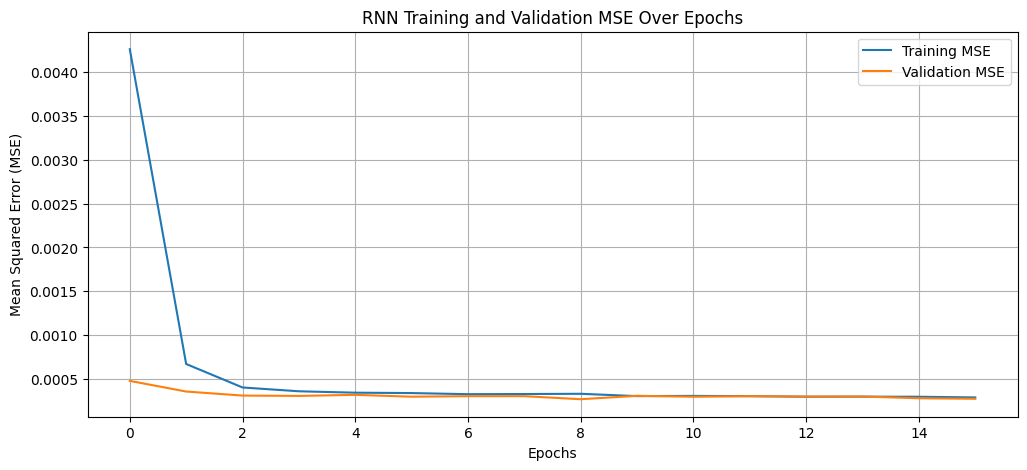

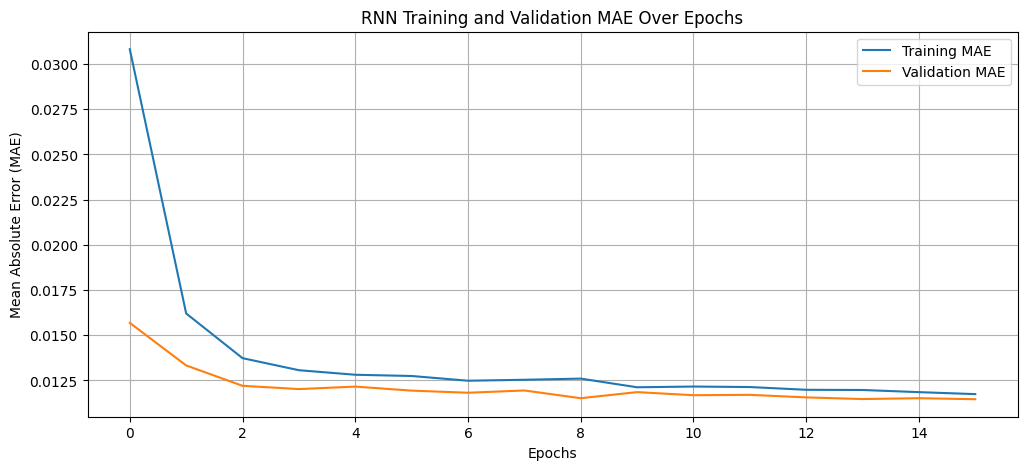

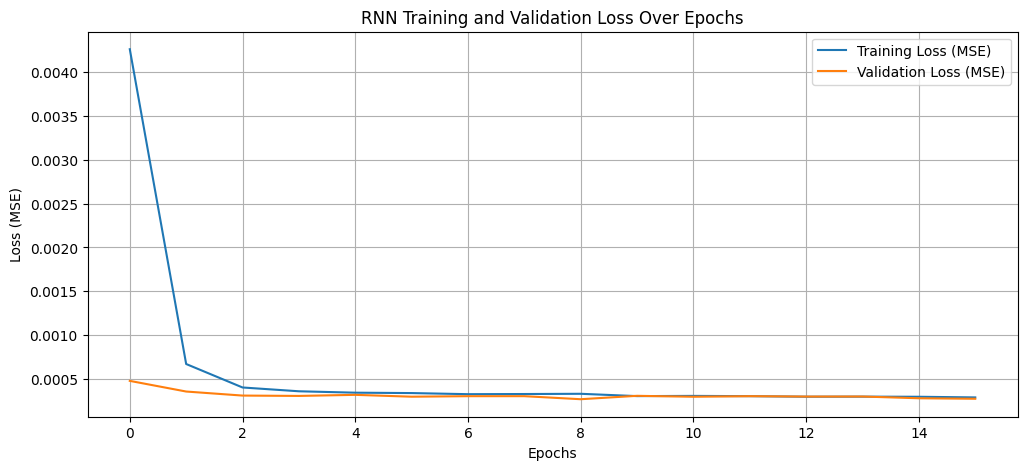

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

#  Set Random Seed for Reproducibility
seed_value = 42  
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"  # Ensures TensorFlow deterministic operations
# -------------------------------
# Step 1: Load Dataset
# -------------------------------
# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Split Data into Features (X) and Target (y)
X = df[features].values
y = df[target].values

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Reshape Input for RNN (samples, timesteps, features)
time_steps = 1  # Single time step for now
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], time_steps, X_test_scaled.shape[1]))

# ✅ Define Optimized RNN Model
model = keras.Sequential([
    layers.SimpleRNN(64, activation="relu", return_sequences=True, input_shape=(time_steps, X_train_scaled.shape[1])),
    layers.SimpleRNN(32, activation="relu", return_sequences=False),
    #layers.Dropout(0.2),  # Regularization
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Single output neuron for regression
])

# ✅ Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Reduced learning rate for stability
    loss="mse",
    metrics=["mse", "mae"]
)

# ✅ Train the Optimized RNN Model
history = model.fit(
    X_train_reshaped, y_train,
    epochs=50,  # Increased epochs for better learning
    validation_data=(X_test_reshaped, y_test),
    batch_size=16,  # Found optimal batch size for RNN
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
    verbose=1
)

# ✅ Evaluate the Model
test_loss, test_mse, test_mae = model.evaluate(X_test_reshaped, y_test, verbose=1)

# ✅ Compute R² Score
y_pred = model.predict(X_test_reshaped).flatten()
test_r2 = r2_score(y_test, y_pred)

# ✅ Print Model Performance
print("\n🔥 Optimized RNN Model Results:")
print(f"📌 Test Loss (MSE): {test_loss:.6f}")
print(f"📌 Test MSE: {test_mse:.6f}")
print(f"📌 Test MAE: {test_mae:.6f}")
print(f"📌 Test R² Score: {test_r2:.6f}")

# ✅ Plot Training Performance
history_df = pd.DataFrame(history.history)

# **Plot MSE**
plt.figure(figsize=(12, 5))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('RNN Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot MAE**
plt.figure(figsize=(12, 5))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('RNN Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot Loss**
plt.figure(figsize=(12, 5))
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['val_loss'], label='Validation Loss (MSE)')
plt.title('RNN Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


RNN batch size testing 


🔥 Training RNN Model with Batch Size: 6
Epoch 1/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


780/780 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0081 - mae: 0.0425 - mse: 0.0081 - val_loss: 4.0190e-04 - val_mae: 0.0146 - val_mse: 4.0190e-04
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1542e-04 - mae: 0.0145 - mse: 4.1542e-04 - val_loss: 3.9483e-04 - val_mae: 0.0137 - val_mse: 3.9483e-04
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8428e-04 - mae: 0.0138 - mse: 3.8428e-04 - val_loss: 3.4002e-04 - val_mae: 0.0133 - val_mse: 3.4002e-04
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.5195e-04 - mae: 0.0131 - mse: 3.5195e-04 - val_loss: 3.4275e-04 - val_mae: 0.0136 - val_mse: 3.4275e-04
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.3824e-04 - mae: 0.0130 - mse: 3.3824e-04 - val_loss: 3.1693e-04 - val_mae: 0.0128 - val_mse: 3.1693e-04
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3790e-04 - mae: 0.0127 - mse: 3.3790e-04 - val_loss: 2.8608e-04 - val_mae: 0.0120 - val_mse: 2.8608e-04
Epoch 7/50
780/780 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0037 - mae: 0.0285 - mse: 0.0037 - val_loss: 3.7380e-04 - val_mae: 0.0136 - val_mse: 3.7380e-04
Epoch 2/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9726e-04 - mae: 0.0142 - mse: 3.9726e-04 - val_loss: 3.6214e-04 - val_mae: 0.0124 - val_mse: 3.6214e-04
Epoch 3/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6597e-04 - mae: 0.0135 - mse: 3.6597e-04 - val_loss: 3.2284e-04 - val_mae: 0.0124 - val_mse: 3.2284e-04
Epoch 4/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3476e-04 - mae: 0.0128 - mse: 3.3476e-04 - val_loss: 3.1517e-04 - val_mae: 0.0129 - val_mse: 3.1517e-04
Epoch 5/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1882e-04 - mae: 0.0125 - mse: 3.1882e-04 - val_loss: 2.8974e-04 - val_mae: 0.0123 - val_mse: 2.8974e-04
Epoch 6/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0818e-04 - mae: 0.0121 - mse: 3.0818e-04 - val_loss: 2.8589e-04 - val_mae: 0.0123 - val_mse: 2.8589e-04
Epoch 7/50
585/585 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0059 - mae: 0.0364 - mse: 0.0059 - val_loss: 3.1893e-04 - val_mae: 0.0123 - val_mse: 3.1893e-04
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5108e-04 - mae: 0.0129 - mse: 3.5108e-04 - val_loss: 3.2535e-04 - val_mae: 0.0129 - val_mse: 3.2535e-04
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2517e-04 - mae: 0.0125 - mse: 3.2517e-04 - val_loss: 3.0809e-04 - val_mae: 0.0127 - val_mse: 3.0809e-04
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0407e-04 - mae: 0.0121 - mse: 3.0407e-04 - val_loss: 2.8535e-04 - val_mae: 0.0120 - val_mse: 2.8535e-04
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0145e-04 - mae: 0.0120 - mse: 3.0145e-04 - val_loss: 3.0570e-04 - val_mae: 0.0127 - val_mse: 3.0570e-04
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9683e-04 - mae: 0.0119 - mse: 2.9683e-04 - val_loss: 2.7582e-04 - val_mae: 0.0118 - val_mse: 2.7582e-04
Epoch 7/50
468/468 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0042 - mae: 0.0353 - mse: 0.0042 - val_loss: 4.1663e-04 - val_mae: 0.0154 - val_mse: 4.1663e-04
Epoch 2/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4040e-04 - mae: 0.0147 - mse: 4.4040e-04 - val_loss: 3.5650e-04 - val_mae: 0.0134 - val_mse: 3.5650e-04
Epoch 3/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7001e-04 - mae: 0.0134 - mse: 3.7001e-04 - val_loss: 3.2181e-04 - val_mae: 0.0128 - val_mse: 3.2181e-04
Epoch 4/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4617e-04 - mae: 0.0130 - mse: 3.4617e-04 - val_loss: 3.2613e-04 - val_mae: 0.0126 - val_mse: 3.2613e-04
Epoch 5/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3924e-04 - mae: 0.0128 - mse: 3.3924e-04 - val_loss: 3.3330e-04 - val_mae: 0.0136 - val_mse: 3.3330e-04
Epoch 6/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2683e-04 - mae: 0.0129 - mse: 3.2683e-04 - val_loss: 2.8466e-04 - val_mae: 0.0125 - val_mse: 2.8466e-04
Epoch 7/50
390/390 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0036 - mae: 0.0322 - mse: 0.0036 - val_loss: 3.2315e-04 - val_mae: 0.0131 - val_mse: 3.2315e-04
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7500e-04 - mae: 0.0135 - mse: 3.7500e-04 - val_loss: 3.1285e-04 - val_mae: 0.0129 - val_mse: 3.1285e-04
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3809e-04 - mae: 0.0129 - mse: 3.3809e-04 - val_loss: 2.9586e-04 - val_mae: 0.0130 - val_mse: 2.9586e-04
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1463e-04 - mae: 0.0125 - mse: 3.1463e-04 - val_loss: 2.9911e-04 - val_mae: 0.0131 - val_mse: 2.9911e-04
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0452e-04 - mae: 0.0121 - mse: 3.0452e-04 - val_loss: 3.2512e-04 - val_mae: 0.0139 - val_mse: 3.2512e-04
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0345e-04 - mae: 0.0120 - mse: 3.0345e-04 - val_loss: 3.0795e-04 - val_mae: 0.0134 - val_mse: 3.0795e-04
Epoch 7/50
293/293 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0078 - mae: 0.0441 - mse: 0.0078 - val_loss: 3.8383e-04 - val_mae: 0.0142 - val_mse: 3.8383e-04
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0689e-04 - mae: 0.0138 - mse: 4.0689e-04 - val_loss: 3.2534e-04 - val_mae: 0.0127 - val_mse: 3.2534e-04
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5282e-04 - mae: 0.0131 - mse: 3.5282e-04 - val_loss: 2.9651e-04 - val_mae: 0.0122 - val_mse: 2.9651e-04
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2636e-04 - mae: 0.0127 - mse: 3.2636e-04 - val_loss: 2.8722e-04 - val_mae: 0.0119 - val_mse: 2.8722e-04
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1728e-04 - mae: 0.0125 - mse: 3.1728e-04 - val_loss: 2.8381e-04 - val_mae: 0.0118 - val_mse: 2.8381e-04
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0979e-04 - mae: 0.0123 - mse: 3.0979e-04 - val_loss: 2.7671e-04 - val_mae: 0.0117 - val_mse: 2.7671e-04
Epoch 7/50
234/234 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0027 - mae: 0.0339 - mse: 0.0027 - val_loss: 4.4357e-04 - val_mae: 0.0164 - val_mse: 4.4357e-04
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9905e-04 - mae: 0.0145 - mse: 3.9905e-04 - val_loss: 5.0155e-04 - val_mae: 0.0182 - val_mse: 5.0155e-04
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8564e-04 - mae: 0.0142 - mse: 3.8564e-04 - val_loss: 4.4810e-04 - val_mae: 0.0174 - val_mse: 4.4810e-04
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3637e-04 - mae: 0.0133 - mse: 3.3637e-04 - val_loss: 3.6753e-04 - val_mae: 0.0155 - val_mse: 3.6753e-04
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2537e-04 - mae: 0.0129 - mse: 3.2537e-04 - val_loss: 3.5592e-04 - val_mae: 0.0152 - val_mse: 3.5592e-04
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1547e-04 - mae: 0.0127 - mse: 3.1547e-04 - val_loss: 3.5340e-04 - val_mae: 0.0152 - val_mse: 3.5340e-04
Epoch 7/50
195/195 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0029 - mae: 0.0332 - mse: 0.0029 - val_loss: 3.5301e-04 - val_mae: 0.0137 - val_mse: 3.5301e-04
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7071e-04 - mae: 0.0136 - mse: 3.7071e-04 - val_loss: 4.3361e-04 - val_mae: 0.0163 - val_mse: 4.3361e-04
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6516e-04 - mae: 0.0135 - mse: 3.6516e-04 - val_loss: 4.7425e-04 - val_mae: 0.0173 - val_mse: 4.7425e-04
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5136e-04 - mae: 0.0133 - mse: 3.5136e-04 - val_loss: 4.5993e-04 - val_mae: 0.0170 - val_mse: 4.5993e-04
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3713e-04 - mae: 0.0130 - mse: 3.3713e-04 - val_loss: 4.1483e-04 - val_mae: 0.0159 - val_mse: 4.1483e-04
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2077e-04 - mae: 0.0126 - mse: 3.2077e-04 - val_loss: 3.7798e-04 - val_mae: 0.0150 - val_mse: 3.7798e-04
Epoch 7/50
147/147 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0038 - mae: 0.0381 - mse: 0.0038 - val_loss: 3.8315e-04 - val_mae: 0.0143 - val_mse: 3.8315e-04
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1093e-04 - mae: 0.0144 - mse: 4.1093e-04 - val_loss: 3.2895e-04 - val_mae: 0.0136 - val_mse: 3.2895e-04
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4387e-04 - mae: 0.0133 - mse: 3.4387e-04 - val_loss: 3.0731e-04 - val_mae: 0.0132 - val_mse: 3.0731e-04
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2275e-04 - mae: 0.0129 - mse: 3.2275e-04 - val_loss: 3.0487e-04 - val_mae: 0.0132 - val_mse: 3.0487e-04
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1065e-04 - mae: 0.0126 - mse: 3.1065e-04 - val_loss: 2.9410e-04 - val_mae: 0.0130 - val_mse: 2.9410e-04
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0482e-04 - mae: 0.0125 - mse: 3.0482e-04 - val_loss: 2.9952e-04 - val_mae: 0.0131 - val_mse: 2.9952e-04
Epoch 7/50
117/117 ━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0018 - mae: 0.0292 - mse: 0.0018 - val_loss: 3.1403e-04 - val_mae: 0.0130 - val_mse: 3.1403e-04
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7493e-04 - mae: 0.0134 - mse: 3.7493e-04 - val_loss: 2.8980e-04 - val_mae: 0.0122 - val_mse: 2.8980e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4171e-04 - mae: 0.0127 - mse: 3.4171e-04 - val_loss: 2.8400e-04 - val_mae: 0.0120 - val_mse: 2.8400e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2019e-04 - mae: 0.0123 - mse: 3.2019e-04 - val_loss: 2.7767e-04 - val_mae: 0.0118 - val_mse: 2.7767e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1275e-04 - mae: 0.0121 - mse: 3.1275e-04 - val_loss: 2.7624e-04 - val_mae: 0.0118 - val_mse: 2.7624e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0109e-04 - mae: 0.0119 - mse: 3.0109e-04 - val_loss: 2.7409e-04 - val_mae: 0.0117 - val_mse: 2.7409e-04
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━

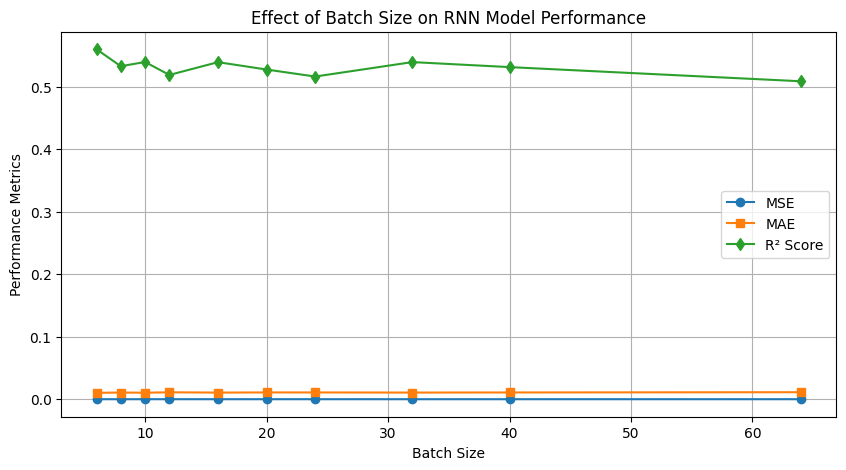

In [4]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

# ✅ Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ Load Dataset
file_path = r"C:\Users\thtuh\Documents\Processed_Field_Data_1.xlsx"
df = pd.read_excel(file_path)

# ✅ Define Features & Target Variable
features = ["Depth", "Vel_StdDev", "Correlation", "Mean_Speed", "SNR", "Vel_Expected_StdDev"]
target = "BT_Vel"

# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Split Data into Features (X) and Target (y)
X = df[features].values
y = df[target].values

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Reshape Input for RNN (samples, timesteps, features)
time_steps = 1  # Single time step for now
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], time_steps, X_test_scaled.shape[1]))

# ✅ Step 9: Test Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training RNN Model with Batch Size: {batch_size}")

    # ✅ Define Optimized RNN Model
    model = keras.Sequential([
        layers.SimpleRNN(64, activation="relu", return_sequences=True, input_shape=(time_steps, X_train_scaled.shape[1])),
        layers.SimpleRNN(32, activation="relu", return_sequences=False),
        #layers.Dropout(0.2),  # Regularization
        layers.Dense(32, activation="relu"),
        layers.Dense(1)  # Single output neuron for regression
    ])

    # ✅ Compile the Model
    model.compile(
        optimizer=Adam(learning_rate=0.001),  # Reduced learning rate for stability
        loss="mse",
        metrics=["mse", "mae"]
    )

    # ✅ Train the Optimized RNN Model
    history = model.fit(
        X_train_reshaped, y_train,
        epochs=50,
        validation_data=(X_test_reshaped, y_test),
        batch_size=batch_size,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
        verbose=1
    )

    # ✅ Evaluate the Model
    test_loss, test_mse, test_mae = model.evaluate(X_test_reshaped, y_test, verbose=1)

    # ✅ Compute R² Score
    y_pred = model.predict(X_test_reshaped).flatten()
    test_r2 = r2_score(y_test, y_pred)

    # ✅ Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Convert Results to DataFrame & Display
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **RNN Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")


# ✅ Step 14: Plot Results
plt.figure(figsize=(10, 5))
plt.plot(results_df["Batch Size"], results_df["Test MSE"], label="MSE", marker='o')
plt.plot(results_df["Batch Size"], results_df["Test MAE"], label="MAE", marker='s')
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], label="R² Score", marker='d')
plt.xlabel("Batch Size")
plt.ylabel("Performance Metrics")
plt.title("Effect of Batch Size on RNN Model Performance")
plt.legend()
plt.grid(True)
plt.show()



Final RNN 


Training RNN Model with Batch Size: 6


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training RNN Model with Batch Size: 8

Training RNN Model with Batch Size: 10

Training RNN Model with Batch Size: 12

Training RNN Model with Batch Size: 16

Training RNN Model with Batch Size: 20

Training RNN Model with Batch Size: 24

Training RNN Model with Batch Size: 32

Training RNN Model with Batch Size: 40

Training RNN Model with Batch Size: 64

Selected best batch size (by lowest val_loss): 12

**RNN Final Result (with best batch size):**
{'Batch Size': 12, 'Test MSE': 0.0002511916682124138, 'Test MAE': 0.01072374265640974, 'Test R² Score': 0.5253782959487314}

RNN Batch Size Sweep (train-only validation):
   Batch Size  Best Val MSE
0           6      0.000261
1           8      0.000257
2          10      0.000255
3          12      0.000251
4          16      0.000259
5          20      0.000257
6          24      0.000317
7          32      0.000253
8          40      0.000251
9          64      0.000256


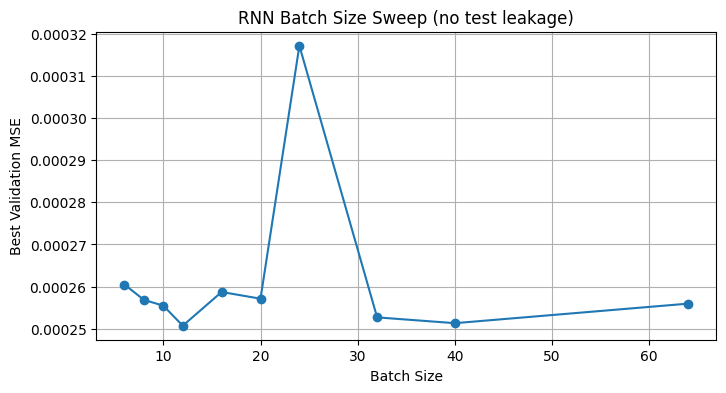

In [7]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

# ✅ Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ Load Dataset
file_path = r"C:\Users\thtuh\Documents\Processed_Field_Data_1.xlsx"
df = pd.read_excel(file_path)

# ✅ Define Features & Target Variable
features = ["Depth", "Vel_StdDev", "Correlation", "Mean_Speed", "SNR", "Vel_Expected_StdDev"]
target = "BT_Vel"

# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Split Data into Features (X) and Target (y)
X = df[features].values
y = df[target].values

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed_value, shuffle=True
)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ✅ Reshape Input for RNN (samples, timesteps, features)
time_steps = 1  # single timestep baseline
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1]))
X_test_reshaped  = X_test_scaled.reshape((X_test_scaled.shape[0],  time_steps, X_test_scaled.shape[1]))

# ✅ Batch-size sweep (train-only validation; no test leakage)
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []
best_bs, best_val = None, float("inf")

def create_rnn_model():
    model = keras.Sequential([
        layers.SimpleRNN(64, activation="relu", return_sequences=True,
                         input_shape=(time_steps, X_train_scaled.shape[1])),
        layers.SimpleRNN(32, activation="relu", return_sequences=False),
        # layers.Dropout(0.2),  # (kept commented out to match your current baseline)
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse", "mae"])
    return model

for batch_size in batch_size_options:
    print(f"\nTraining RNN Model with Batch Size: {batch_size}")
    model = create_rnn_model()
    history = model.fit(
        X_train_reshaped, y_train,
        epochs=50,
        validation_split=0.2,   # ← train-only validation (no test-as-val)
        batch_size=batch_size,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
        verbose=0
    )
    this_best_val = min(history.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best_val})
    if this_best_val < best_val:
        best_val, best_bs = this_best_val, batch_size

print("\nSelected best batch size (by lowest val_loss):", best_bs)

# ✅ Final train with chosen batch size; evaluate once on test
final_model = create_rnn_model()
final_model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=best_bs,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
    verbose=0
)

test_loss, test_mse, test_mae = final_model.evaluate(X_test_reshaped, y_test, verbose=0)
y_pred = final_model.predict(X_test_reshaped, verbose=0).ravel()  # flatten for r2_score
test_r2 = r2_score(y_test, y_pred)

print("\n**RNN Final Result (with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse, "Test MAE": test_mae, "Test R² Score": test_r2})

# ✅ Show sweep table (optional)
import pandas as pd
results_df = pd.DataFrame(results).sort_values("Batch Size")
print("\nRNN Batch Size Sweep (train-only validation):")
print(results_df)

# ✅ Plot (optional)
plt.figure(figsize=(8, 4))
plt.plot(results_df["Batch Size"], results_df["Best Val MSE"], marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Best Validation MSE")
plt.title("RNN Batch Size Sweep (no test leakage)")
plt.grid(True)
plt.show()


RNN Optimization : Bayesation

In [23]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt
import random
import os

# ✅ **Set Random Seed for Reproducibility**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# **Step 1: Load Dataset**
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx' # Update your file path
df = pd.read_excel(file_path)

# **Step 1.1: Select Numeric Features & Target**
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev','Bin_Distance']
target = 'BT_Vel'  # Target variable

# ✅ **Drop Missing Values**
df = df.dropna(subset=features + [target])

# ✅ **Convert to NumPy arrays**
X = df[features].values
y = df[target].values.reshape(-1, 1)

# ✅ **Split Dataset**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ **Standardize Features**
scaler = StandardScaler()
X_train_prep = scaler.fit_transform(X_train)
X_test_prep = scaler.transform(X_test)

# ✅ **Reshape for RNN (samples, time steps, features)**
X_train_prep = X_train_prep.reshape((X_train_prep.shape[0], 1, X_train_prep.shape[1]))
X_test_prep = X_test_prep.reshape((X_test_prep.shape[0], 1, X_test_prep.shape[1]))

# ✅ **Hyperparameter Tuning Function**
def build_rnn_model(hp):
    model = keras.Sequential()

    # Tune the number of RNN layers (1 to 3)
    for i in range(hp.Int('n_rnn_layers', 1, 3)):
        model.add(layers.SimpleRNN(
            units=hp.Int(f'rnn_units_{i}', min_value=32, max_value=256, step=32),
            return_sequences=True if i < hp.Int('n_rnn_layers', 1, 3) - 1 else False,
            dropout=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.4, step=0.1)
        ))

    # Fully connected layers
    for i in range(hp.Int('n_dense_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'dense_units_{i}', min_value=16, max_value=128, step=16),
            activation='relu'
        ))

    # Output layer for regression
    model.add(layers.Dense(1))

    # Tune learning rate
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mse",
        metrics=["mse", "mae"]
    )
    return model

# ✅ **Hyperparameter Search with Bayesian Optimization**
tuner = kt.BayesianOptimization(
    build_rnn_model,
    objective='val_mse',
    max_trials=10,
    directory='rnn_tuning',
    project_name='Optimized_RNN'
)

# ✅ **Run the Hyperparameter Search**
tuner.search(X_train_prep, y_train, epochs=20, validation_data=(X_test_prep, y_test), verbose=1)

# ✅ **Get Best Hyperparameters**
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best RNN layers: {best_hps.get('n_rnn_layers')}")
print(f"Best RNN units per layer: {[best_hps.get(f'rnn_units_{i}') for i in range(best_hps.get('n_rnn_layers'))]}")
print(f"Best Dropout rates: {[best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_rnn_layers'))]}")
print(f"Best Dense layers: {best_hps.get('n_dense_layers')}")
print(f"Best Dense units per layer: {[best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))]}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# ✅ **Save the Best Hyperparameters for Reuse**
best_hyperparameters = {
    'n_rnn_layers': best_hps.get('n_rnn_layers'),
    'rnn_units': [best_hps.get(f'rnn_units_{i}') for i in range(best_hps.get('n_rnn_layers'))],
    'dropout_rates': [best_hps.get(f'dropout_rate_{i}') for i in range(best_hps.get('n_rnn_layers'))],
    'n_dense_layers': best_hps.get('n_dense_layers'),
    'dense_units': [best_hps.get(f'dense_units_{i}') for i in range(best_hps.get('n_dense_layers'))],
    'learning_rate': best_hps.get('learning_rate')
}


Reloading Tuner from rnn_tuning\Optimized_RNN\tuner0.json
Best RNN layers: 1
Best RNN units per layer: [160]
Best Dropout rates: [0.1]
Best Dense layers: 3
Best Dense units per layer: [64, 16, 48]
Best Learning Rate: 0.00016191837952092902


In [24]:
# ✅ **Set Random Seed for Consistency**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ **Train the Final Optimized RNN Model with Different Batch Sizes**
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []  # List to store results

for batch_size in batch_size_options:
    print(f"\n🔥 Training RNN Model with Batch Size: {batch_size}")

    # **Rebuild RNN Model with Best Hyperparameters**
    final_rnn_model = keras.Sequential()

    # Add RNN layers
    for i in range(best_hyperparameters['n_rnn_layers']):
        final_rnn_model.add(layers.SimpleRNN(
            units=best_hyperparameters['rnn_units'][i],
            return_sequences=True if i < best_hyperparameters['n_rnn_layers'] - 1 else False,
            dropout=best_hyperparameters['dropout_rates'][i]
        ))

    # Add Fully Connected Dense Layers
    for i in range(best_hyperparameters['n_dense_layers']):
        final_rnn_model.add(layers.Dense(
            units=best_hyperparameters['dense_units'][i],
            activation='relu'
        ))

    # Output layer
    final_rnn_model.add(layers.Dense(1))

    # Compile Model
    final_rnn_model.compile(
        optimizer=Adam(learning_rate=best_hyperparameters['learning_rate']),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # **Train Model**
    history_final_rnn = final_rnn_model.fit(
        X_train_prep, y_train,
        epochs=50,
        validation_data=(X_test_prep, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ **Evaluate the Model**
    test_loss, test_mse, test_mae = final_rnn_model.evaluate(X_test_prep, y_test, verbose=1)

    # ✅ **Compute R² Score**
    y_pred_final = final_rnn_model.predict(X_test_prep).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ **Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ **Convert Results to DataFrame & Display**
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **RNN Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")



🔥 Training RNN Model with Batch Size: 6
Epoch 1/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0088 - mae: 0.0502 - mse: 0.0088 - val_loss: 3.1556e-04 - val_mae: 0.0126 - val_mse: 3.1556e-04
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.7371e-04 - mae: 0.0135 - mse: 3.7371e-04 - val_loss: 2.8489e-04 - val_mae: 0.0118 - val_mse: 2.8489e-04
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1469e-04 - mae: 0.0122 - mse: 3.1469e-04 - val_loss: 2.8462e-04 - val_mae: 0.0119 - val_mse: 2.8462e-04
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0805e-04 - mae: 0.0121 - mse: 3.0805e-04 - val_loss: 2.7512e-04 - val_mae: 0.0114 - val_mse: 2.7512e-04
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9824e-04 - mae: 0.0118 - mse: 2.9824e-04 - val_loss: 2.8235e-04 - val_mae: 0.0116 - val_mse: 2.8235e-04
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0578e-04 - mae: 0.0121 - mse: 3.0578e-04 - val_loss: 2.7506e-04 - val_mae: 

Combining LSTM and CNN

✅ CNN+LSTM Input Shape: (4679, 1, 7)
Epoch 1/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.2412e-04 - mae: 0.0162 - mse: 5.2412e-04 - val_loss: 2.7856e-04 - val_mae: 0.0115 - val_mse: 2.7856e-04
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9487e-04 - mae: 0.0117 - mse: 2.9487e-04 - val_loss: 2.6437e-04 - val_mae: 0.0110 - val_mse: 2.6437e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8989e-04 - mae: 0.0115 - mse: 2.8989e-04 - val_loss: 2.5954e-04 - val_mae: 0.0109 - val_mse: 2.5954e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8768e-04 - mae: 0.0114 - mse: 2.8768e-04 - val_loss: 2.5805e-04 - val_mae: 0.0110 - val_mse: 2.5805e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8364e-04 - mae: 0.0113 - mse: 2.8364e-04 - val_loss: 2.5478e-04 - val_mae: 0.0108 - val_mse: 2.5478e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8389e-04 - mae: 0.0113 - mse: 2.8389e-04 - val_loss: 2.5206e-04 - val_mae: 0.0108 - val_mse: 2.5206e-04
Epoch 7/50
74/74 ━━━━━━━━━━

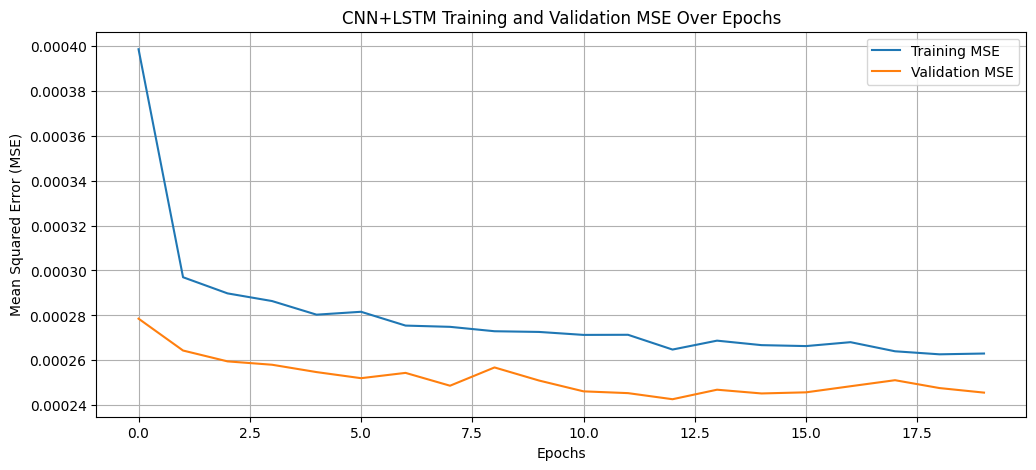

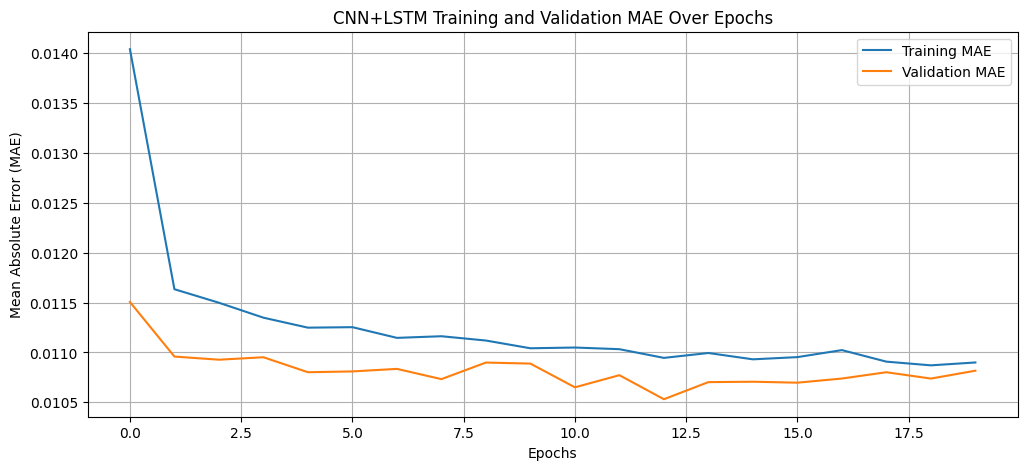

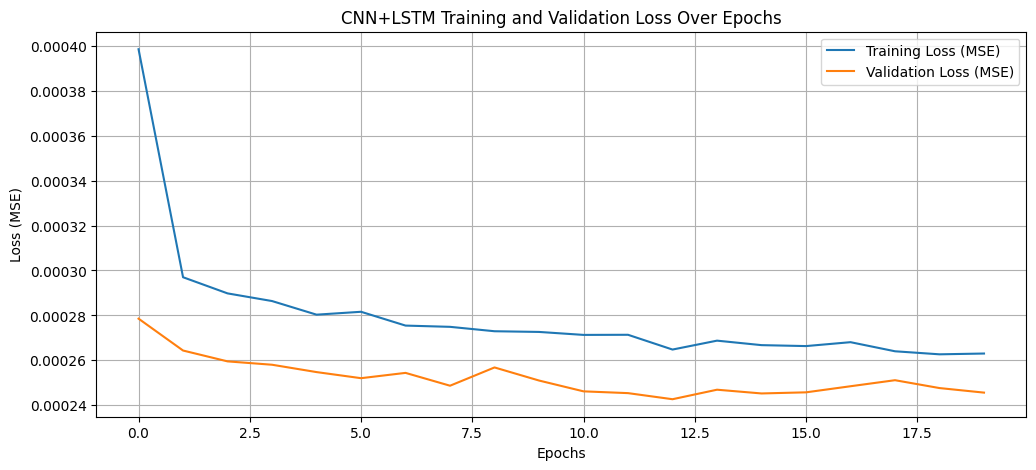

In [40]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

# ✅ Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ Load Dataset
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx'  # Update file path
df = pd.read_excel(file_path)

# ✅ Define Features & Target Variable
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev', 'Bin_Distance']
target = 'BT_Vel'

# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Split Data into Features (X) and Target (y)
X = df[features].values
y = df[target].values

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Determine `time_steps` and Ensure Compatibility
time_steps = 2  # Initial assumption
num_features = X_train_scaled.shape[1]

# ✅ Adjust `time_steps` if needed
if num_features % time_steps != 0:
    time_steps = 1  # Fallback if features cannot be evenly divided

num_features_per_step = num_features // time_steps

# ✅ Reshape Data for CNN+LSTM
X_train_cnn_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, num_features_per_step))
X_test_cnn_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], time_steps, num_features_per_step))

print("✅ CNN+LSTM Input Shape:", X_train_cnn_lstm.shape)  # Expected: (samples, time_steps, features_per_step)

# ✅ Define CNN+LSTM Model
model = keras.Sequential([
    # CNN Block
    layers.Conv1D(filters=64, kernel_size=1, activation="relu", input_shape=(time_steps, num_features_per_step)),
    layers.Conv1D(filters=32, kernel_size=1, activation="relu"),
    layers.Flatten(),

    # LSTM Block
    layers.Reshape((1, -1)),  # Reshape for LSTM compatibility
    layers.LSTM(64, activation='relu', return_sequences=True),
    layers.LSTM(32, activation='relu', return_sequences=False),
    layers.Dropout(0.2),  # Regularization

    # Fully Connected Layers
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Regression output
])

# ✅ Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mse", "mae"]
)

# ✅ Train Model
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(
    X_train_cnn_lstm, y_train,
    epochs=50,
    validation_data=(X_test_cnn_lstm, y_test),
    batch_size=64,  # Best batch size found in LSTM tuning
    callbacks=[early_stopping_cb],
    verbose=1
)

# ✅ Evaluate Model
test_loss, test_mse, test_mae = model.evaluate(X_test_cnn_lstm, y_test, verbose=1)

# ✅ Compute R² Score
y_pred = model.predict(X_test_cnn_lstm).flatten()
test_r2 = r2_score(y_test, y_pred)

# ✅ Print Model Performance
print(f"\n🔥 Optimized CNN+LSTM Model Results:")
print(f"📌 Test Loss (MSE): {test_loss:.6f}")
print(f"📌 Test MSE: {test_mse:.6f}")
print(f"📌 Test MAE: {test_mae:.6f}")
print(f"📌 Test R² Score: {test_r2:.6f}")

# ✅ Plot Training Performance
history_df = pd.DataFrame(history.history)

# **Plot MSE**
plt.figure(figsize=(12, 5))
plt.plot(history_df['mse'], label='Training MSE')
plt.plot(history_df['val_mse'], label='Validation MSE')
plt.title('CNN+LSTM Training and Validation MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot MAE**
plt.figure(figsize=(12, 5))
plt.plot(history_df['mae'], label='Training MAE')
plt.plot(history_df['val_mae'], label='Validation MAE')
plt.title('CNN+LSTM Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# **Plot Loss**
plt.figure(figsize=(12, 5))
plt.plot(history_df['loss'], label='Training Loss (MSE)')
plt.plot(history_df['val_loss'], label='Validation Loss (MSE)')
plt.title('CNN+LSTM Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()



CNN *LSTM batch size testing 

✅ CNN+LSTM Input Shape: (4679, 1, 7)

🔥 Training CNN+LSTM Model with Batch Size: 6
Epoch 1/50


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.7161e-04 - mae: 0.0136 - mse: 3.7161e-04 - val_loss: 2.6808e-04 - val_mae: 0.0111 - val_mse: 2.6808e-04
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0181e-04 - mae: 0.0117 - mse: 3.0181e-04 - val_loss: 2.6446e-04 - val_mae: 0.0114 - val_mse: 2.6446e-04
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9647e-04 - mae: 0.0116 - mse: 2.9647e-04 - val_loss: 2.6664e-04 - val_mae: 0.0116 - val_mse: 2.6664e-04
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8866e-04 - mae: 0.0115 - mse: 2.8866e-04 - val_loss: 2.5861e-04 - val_mae: 0.0111 - val_mse: 2.5861e-04
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8615e-04 - mae: 0.0114 - mse: 2.8615e-04 - val_loss: 2.5871e-04 - val_mae: 0.0114 - val_mse: 2.5871e-04
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8265e-04 - mae: 0.0113 - mse: 2.8265e-04 - val_loss: 2.5254e-04 - val_mae: 0.0110 - val_mse: 2.5254e-04
Epoch 7/50
780/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.0123e-04 - mae: 0.0140 - mse: 4.0123e-04 - val_loss: 2.6659e-04 - val_mae: 0.0111 - val_mse: 2.6659e-04
Epoch 2/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0519e-04 - mae: 0.0118 - mse: 3.0519e-04 - val_loss: 2.8081e-04 - val_mae: 0.0120 - val_mse: 2.8081e-04
Epoch 3/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9622e-04 - mae: 0.0116 - mse: 2.9622e-04 - val_loss: 2.6567e-04 - val_mae: 0.0114 - val_mse: 2.6567e-04
Epoch 4/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9342e-04 - mae: 0.0116 - mse: 2.9342e-04 - val_loss: 2.6288e-04 - val_mae: 0.0114 - val_mse: 2.6288e-04
Epoch 5/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8605e-04 - mae: 0.0114 - mse: 2.8605e-04 - val_loss: 2.6203e-04 - val_mae: 0.0116 - val_mse: 2.6203e-04
Epoch 6/50
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7901e-04 - mae: 0.0114 - mse: 2.7901e-04 - val_loss: 2.6409e-04 - val_mae: 0.0115 - val_mse: 2.6409e-04
Epoch 7/50
585/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.7824e-04 - mae: 0.0136 - mse: 3.7824e-04 - val_loss: 2.6164e-04 - val_mae: 0.0115 - val_mse: 2.6164e-04
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.0123e-04 - mae: 0.0117 - mse: 3.0123e-04 - val_loss: 2.6419e-04 - val_mae: 0.0113 - val_mse: 2.6419e-04
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.9126e-04 - mae: 0.0115 - mse: 2.9126e-04 - val_loss: 2.5218e-04 - val_mae: 0.0111 - val_mse: 2.5218e-04
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.9298e-04 - mae: 0.0115 - mse: 2.9298e-04 - val_loss: 2.5113e-04 - val_mae: 0.0112 - val_mse: 2.5113e-04
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.8307e-04 - mae: 0.0114 - mse: 2.8307e-04 - val_loss: 2.4987e-04 - val_mae: 0.0112 - val_mse: 2.4987e-04
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.8146e-04 - mae: 0.0113 - mse: 2.8146e-04 - val_loss: 2.4301e-04 - val_mae: 0.0108 - val_mse: 2.4301e-04
Epoch 7/50
468/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


390/390 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.8532e-04 - mae: 0.0138 - mse: 3.8532e-04 - val_loss: 2.7716e-04 - val_mae: 0.0122 - val_mse: 2.7716e-04
Epoch 2/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.9289e-04 - mae: 0.0117 - mse: 2.9289e-04 - val_loss: 2.6218e-04 - val_mae: 0.0115 - val_mse: 2.6218e-04
Epoch 3/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.8570e-04 - mae: 0.0116 - mse: 2.8570e-04 - val_loss: 2.5443e-04 - val_mae: 0.0112 - val_mse: 2.5443e-04
Epoch 4/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.8407e-04 - mae: 0.0114 - mse: 2.8407e-04 - val_loss: 2.5321e-04 - val_mae: 0.0112 - val_mse: 2.5321e-04
Epoch 5/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.7977e-04 - mae: 0.0114 - mse: 2.7977e-04 - val_loss: 2.4954e-04 - val_mae: 0.0111 - val_mse: 2.4954e-04
Epoch 6/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.8004e-04 - mae: 0.0114 - mse: 2.8004e-04 - val_loss: 2.4955e-04 - val_mae: 0.0111 - val_mse: 2.4955e-04
Epoch 7/50
390/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.7042e-04 - mae: 0.0134 - mse: 3.7042e-04 - val_loss: 2.6136e-04 - val_mae: 0.0111 - val_mse: 2.6136e-04
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0205e-04 - mae: 0.0118 - mse: 3.0205e-04 - val_loss: 2.6369e-04 - val_mae: 0.0110 - val_mse: 2.6369e-04
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9424e-04 - mae: 0.0116 - mse: 2.9424e-04 - val_loss: 2.6273e-04 - val_mae: 0.0109 - val_mse: 2.6273e-04
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8837e-04 - mae: 0.0115 - mse: 2.8837e-04 - val_loss: 2.6060e-04 - val_mae: 0.0109 - val_mse: 2.6060e-04
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8660e-04 - mae: 0.0114 - mse: 2.8660e-04 - val_loss: 2.5613e-04 - val_mae: 0.0109 - val_mse: 2.5613e-04
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7778e-04 - mae: 0.0113 - mse: 2.7778e-04 - val_loss: 2.5349e-04 - val_mae: 0.0108 - val_mse: 2.5349e-04
Epoch 7/50
293/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 4.3694e-04 - mae: 0.0147 - mse: 4.3694e-04 - val_loss: 2.6108e-04 - val_mae: 0.0110 - val_mse: 2.6108e-04
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9244e-04 - mae: 0.0115 - mse: 2.9244e-04 - val_loss: 2.5843e-04 - val_mae: 0.0110 - val_mse: 2.5843e-04
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8139e-04 - mae: 0.0114 - mse: 2.8139e-04 - val_loss: 2.5866e-04 - val_mae: 0.0109 - val_mse: 2.5866e-04
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8128e-04 - mae: 0.0113 - mse: 2.8128e-04 - val_loss: 2.5720e-04 - val_mae: 0.0109 - val_mse: 2.5720e-04
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7957e-04 - mae: 0.0113 - mse: 2.7957e-04 - val_loss: 2.6007e-04 - val_mae: 0.0111 - val_mse: 2.6007e-04
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7339e-04 - mae: 0.0112 - mse: 2.7339e-04 - val_loss: 2.5579e-04 - val_mae: 0.0109 - val_mse: 2.5579e-04
Epoch 7/50
234/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 4.0769e-04 - mae: 0.0143 - mse: 4.0769e-04 - val_loss: 2.6286e-04 - val_mae: 0.0111 - val_mse: 2.6286e-04
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8788e-04 - mae: 0.0114 - mse: 2.8788e-04 - val_loss: 2.5856e-04 - val_mae: 0.0111 - val_mse: 2.5856e-04
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7901e-04 - mae: 0.0112 - mse: 2.7901e-04 - val_loss: 2.5679e-04 - val_mae: 0.0110 - val_mse: 2.5679e-04
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7928e-04 - mae: 0.0113 - mse: 2.7928e-04 - val_loss: 2.5689e-04 - val_mae: 0.0111 - val_mse: 2.5689e-04
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7836e-04 - mae: 0.0112 - mse: 2.7836e-04 - val_loss: 2.5311e-04 - val_mae: 0.0109 - val_mse: 2.5311e-04
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7274e-04 - mae: 0.0111 - mse: 2.7274e-04 - val_loss: 2.5678e-04 - val_mae: 0.0111 - val_mse: 2.5678e-04
Epoch 7/50
195

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4.1349e-04 - mae: 0.0144 - mse: 4.1349e-04 - val_loss: 2.6611e-04 - val_mae: 0.0112 - val_mse: 2.6611e-04
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8913e-04 - mae: 0.0115 - mse: 2.8913e-04 - val_loss: 2.5679e-04 - val_mae: 0.0111 - val_mse: 2.5679e-04
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8660e-04 - mae: 0.0114 - mse: 2.8660e-04 - val_loss: 2.5075e-04 - val_mae: 0.0109 - val_mse: 2.5075e-04
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8017e-04 - mae: 0.0113 - mse: 2.8017e-04 - val_loss: 2.4981e-04 - val_mae: 0.0110 - val_mse: 2.4981e-04
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7989e-04 - mae: 0.0113 - mse: 2.7989e-04 - val_loss: 2.4565e-04 - val_mae: 0.0108 - val_mse: 2.4565e-04
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7338e-04 - mae: 0.0112 - mse: 2.7338e-04 - val_loss: 2.4516e-04 - val_mae: 0.0108 - val_mse: 2.4516e-04
Epoch 7/50
147/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4.6155e-04 - mae: 0.0153 - mse: 4.6155e-04 - val_loss: 2.5907e-04 - val_mae: 0.0113 - val_mse: 2.5907e-04
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8597e-04 - mae: 0.0115 - mse: 2.8597e-04 - val_loss: 2.5290e-04 - val_mae: 0.0111 - val_mse: 2.5290e-04
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8870e-04 - mae: 0.0114 - mse: 2.8870e-04 - val_loss: 2.4829e-04 - val_mae: 0.0110 - val_mse: 2.4829e-04
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8413e-04 - mae: 0.0114 - mse: 2.8413e-04 - val_loss: 2.4860e-04 - val_mae: 0.0109 - val_mse: 2.4860e-04
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7374e-04 - mae: 0.0112 - mse: 2.7374e-04 - val_loss: 2.4546e-04 - val_mae: 0.0107 - val_mse: 2.4546e-04
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7203e-04 - mae: 0.0112 - mse: 2.7203e-04 - val_loss: 2.4630e-04 - val_mae: 0.0108 - val_mse: 2.4630e-04
Epoch 7/50
117/

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 5.1082e-04 - mae: 0.0163 - mse: 5.1082e-04 - val_loss: 2.8521e-04 - val_mae: 0.0118 - val_mse: 2.8521e-04
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9959e-04 - mae: 0.0118 - mse: 2.9959e-04 - val_loss: 2.6376e-04 - val_mae: 0.0111 - val_mse: 2.6376e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9340e-04 - mae: 0.0116 - mse: 2.9340e-04 - val_loss: 2.5730e-04 - val_mae: 0.0109 - val_mse: 2.5730e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8528e-04 - mae: 0.0114 - mse: 2.8528e-04 - val_loss: 2.5324e-04 - val_mae: 0.0107 - val_mse: 2.5324e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9751e-04 - mae: 0.0115 - mse: 2.9751e-04 - val_loss: 2.5468e-04 - val_mae: 0.0109 - val_mse: 2.5468e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7928e-04 - mae: 0.0112 - mse: 2.7928e-04 - val_loss: 2.5116e-04 - val_mae: 0.0108 - val_mse: 2.5116e-04
Epoch 7/50
74/74 ━━━━━━━━━━

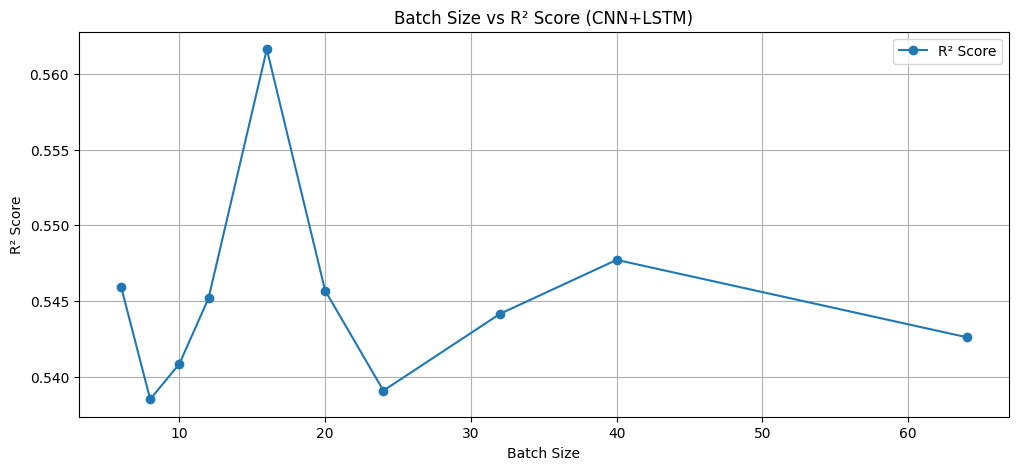

In [41]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

# ✅ Set Random Seed for Reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ Load Dataset
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx'  # Update file path
df = pd.read_excel(file_path)

# ✅ Define Features & Target Variable
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev', 'Bin_Distance']
target = 'BT_Vel'

# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Split Data into Features (X) and Target (y)
X = df[features].values
y = df[target].values

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value, shuffle=True)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Determine `time_steps` and Ensure Compatibility
time_steps = 2  # Initial assumption
num_features = X_train_scaled.shape[1]

# ✅ Adjust `time_steps` if needed
if num_features % time_steps != 0:
    time_steps = 1  # Fallback if features cannot be evenly divided

num_features_per_step = num_features // time_steps

# ✅ Reshape Data for CNN+LSTM
X_train_cnn_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, num_features_per_step))
X_test_cnn_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], time_steps, num_features_per_step))

print("✅ CNN+LSTM Input Shape:", X_train_cnn_lstm.shape)  # Expected: (samples, time_steps, features_per_step)

# ✅ Test Different Batch Sizes
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training CNN+LSTM Model with Batch Size: {batch_size}")

    # ✅ Define CNN+LSTM Model
    model = keras.Sequential([
        # CNN Block
        layers.Conv1D(filters=64, kernel_size=1, activation="relu", input_shape=(time_steps, num_features_per_step)),
        layers.Conv1D(filters=32, kernel_size=1, activation="relu"),
        layers.Flatten(),

        # LSTM Block
        layers.Reshape((1, -1)),  # Reshape for LSTM compatibility
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu', return_sequences=False),
        layers.Dropout(0.2),  # Regularization

        # Fully Connected Layers
        layers.Dense(32, activation="relu"),
        layers.Dense(1)  # Regression output
    ])

    # ✅ Compile Model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # ✅ Train Model
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history = model.fit(
        X_train_cnn_lstm, y_train,
        epochs=50,
        validation_data=(X_test_cnn_lstm, y_test),
        batch_size=batch_size,
        callbacks=[early_stopping_cb],
        verbose=1
    )

    # ✅ Evaluate Model
    test_loss, test_mse, test_mae = model.evaluate(X_test_cnn_lstm, y_test, verbose=1)

    # ✅ Compute R² Score
    y_pred = model.predict(X_test_cnn_lstm).flatten()
    test_r2 = r2_score(y_test, y_pred)

    # ✅ Store Results
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2
    })

    print(f"✅ Stored results for Batch Size: {batch_size}")

# ✅ Convert Results to DataFrame & Display
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **CNN+LSTM Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")

# ✅ Plot Batch Size Performance
plt.figure(figsize=(12, 5))
plt.plot(results_df["Batch Size"], results_df["Test R² Score"], marker='o', linestyle='-', label="R² Score")
plt.title("Batch Size vs R² Score (CNN+LSTM)")
plt.xlabel("Batch Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()


Final LSTM+CNN

✅ CNN+LSTM Input Shape: (4679, 1, 7)

Training CNN+LSTM Model with Batch Size: 6


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN+LSTM Model with Batch Size: 8

Training CNN+LSTM Model with Batch Size: 10

Training CNN+LSTM Model with Batch Size: 12

Training CNN+LSTM Model with Batch Size: 16

Training CNN+LSTM Model with Batch Size: 20

Training CNN+LSTM Model with Batch Size: 24

Training CNN+LSTM Model with Batch Size: 32

Training CNN+LSTM Model with Batch Size: 40

Training CNN+LSTM Model with Batch Size: 64

Selected best batch size (by lowest val_loss): 32

**CNN+LSTM Final Result (with best batch size):**
{'Batch Size': 32, 'Test MSE': 0.0002509790938347578, 'Test MAE': 0.010898844338953495, 'Test R² Score': 0.5257799929424243}

🔥 **CNN+LSTM Batch Size Sweep (train-only validation):**
   Batch Size  Best Val MSE
0           6      0.000243
1           8      0.000247
2          10      0.000252
3          12      0.000242
4          16      0.000241
5          20      0.000245
6          24      0.000250
7          32      0.000234
8          40      0.000245
9          64      0.000246


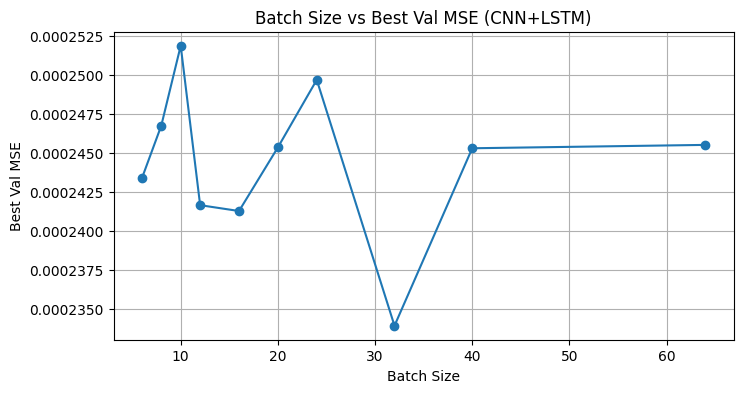

In [9]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import random
import os

# ✅ Set Random Seed for Reproducibility
seed_value = 42
np.random.set_seed = seed_value
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ Load Dataset
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# ✅ Define Features & Target Variable
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev', 'Bin_Distance']
target = 'BT_Vel'

# ✅ Handle Missing Values
df.dropna(subset=features + [target], inplace=True)

# ✅ Split Data into Features (X) and Target (y)
X = df[features].values
y = df[target].values

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed_value, shuffle=True
)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ✅ Determine `time_steps` and Ensure Compatibility
time_steps = 2  # Initial assumption
num_features = X_train_scaled.shape[1]
if num_features % time_steps != 0:
    time_steps = 1  # Fallback if features cannot be evenly divided
num_features_per_step = num_features // time_steps

# ✅ Reshape Data for CNN+LSTM
X_train_cnn_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], time_steps, num_features_per_step))
X_test_cnn_lstm  = X_test_scaled.reshape((X_test_scaled.shape[0],  time_steps, num_features_per_step))
print("✅ CNN+LSTM Input Shape:", X_train_cnn_lstm.shape)

# ✅ Model factory (architecture unchanged)
def create_cnn_lstm_model():
    model = keras.Sequential([
        # CNN Block
        layers.Conv1D(filters=64, kernel_size=1, activation="relu",
                      input_shape=(time_steps, num_features_per_step)),
        layers.Conv1D(filters=32, kernel_size=1, activation="relu"),
        layers.Flatten(),

        # LSTM Block
        layers.Reshape((1, -1)),
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu', return_sequences=False),
        layers.Dropout(0.2),

        # Fully Connected Layers
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse", "mae"])
    return model

# ✅ Batch-size sweep (train-only validation; no test leakage)
batch_size_options = [6, 8, 10, 12, 16, 20, 24, 32, 40, 64]
results = []
best_bs, best_val = None, float("inf")

for batch_size in batch_size_options:
    print(f"\nTraining CNN+LSTM Model with Batch Size: {batch_size}")
    model = create_cnn_lstm_model()
    history = model.fit(
        X_train_cnn_lstm, y_train,
        epochs=50,
        validation_split=0.2,   # ← CHANGED: train-only validation (no test-as-val)
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
        verbose=0
    )
    this_best = min(history.history["val_loss"])
    results.append({"Batch Size": batch_size, "Best Val MSE": this_best})
    if this_best < best_val:
        best_val, best_bs = this_best, batch_size

print("\nSelected best batch size (by lowest val_loss):", best_bs)

# ✅ Final training with chosen batch size; single test evaluation
final_model = create_cnn_lstm_model()
final_model.fit(
    X_train_cnn_lstm, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=best_bs,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)],
    verbose=0
)

test_loss, test_mse, test_mae = final_model.evaluate(X_test_cnn_lstm, y_test, verbose=0)
y_pred = final_model.predict(X_test_cnn_lstm, verbose=0).ravel()
test_r2 = r2_score(y_test, y_pred)

print("\n**CNN+LSTM Final Result (with best batch size):**")
print({"Batch Size": best_bs, "Test MSE": test_mse, "Test MAE": test_mae, "Test R² Score": test_r2})

# ✅ Convert Results to DataFrame & Display
results_df = pd.DataFrame(results).sort_values("Batch Size")
print("\n🔥 **CNN+LSTM Batch Size Sweep (train-only validation):**")
print(results_df)

# ✅ Plot Batch Size Performance (optional)
plt.figure(figsize=(8, 4))
plt.plot(results_df["Batch Size"], results_df["Best Val MSE"], marker='o')
plt.title("Batch Size vs Best Val MSE (CNN+LSTM)")
plt.xlabel("Batch Size"); plt.ylabel("Best Val MSE"); plt.grid(True); plt.show()


CNN + LSTM Bayesian

In [31]:
import os
import random
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import r2_score

# ✅ **Extract Best Hyperparameters**
best_n_conv_layers = best_hyperparameters['n_conv_layers']
best_filters = best_hyperparameters['filters']
best_kernel_sizes = best_hyperparameters['kernel_sizes']
best_lstm_units = best_hyperparameters['lstm_units'][0]  # Extract first LSTM unit
best_n_dense_layers = best_hyperparameters['n_dense_layers']
best_dense_units = best_hyperparameters['dense_units']
best_learning_rate = best_hyperparameters['learning_rate']

# ✅ **Set Random Seed for Consistency**
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

# ✅ **Get Input Shape from Processed Data**
time_steps = X_train.shape[1]
num_features = X_train.shape[2]

# ✅ **Train the Final Optimized CNN+LSTM Model with Different Batch Sizes**
batch_size_options = [6, 8, 12, 16, 20, 24, 32, 40, 64]  # Try different batch sizes
results = []

for batch_size in batch_size_options:
    print(f"\n🔥 Training CNN+LSTM Model with Batch Size: {batch_size}")

    # ✅ **Manually Rebuild CNN+LSTM Model Using Best Hyperparameters**
    final_model = keras.Sequential()

    # ✅ **Add Conv1D Layers Based on Best Hyperparameters**
    for i in range(best_n_conv_layers):
        final_model.add(layers.Conv1D(
            filters=best_filters[i], 
            kernel_size=best_kernel_sizes[i], 
            activation="relu",
            padding="same",
            input_shape=(time_steps, num_features) if i == 0 else None  # Only set input shape for the first layer
        ))

    final_model.add(layers.MaxPooling1D(pool_size=1))

    # ✅ **Flatten Before Passing to LSTM**
    final_model.add(layers.Flatten())

    # ✅ **Reshape Flattened Data for LSTM Input**
    final_model.add(layers.Reshape((1, -1)))  # Reshape CNN output for LSTM

    # ✅ **LSTM Block**
    final_model.add(layers.LSTM(best_lstm_units, return_sequences=False))

    # ✅ **Dense Layers**
    for i in range(best_n_dense_layers):
        final_model.add(layers.Dense(best_dense_units[i], activation="relu"))

    # ✅ **Output layer**
    final_model.add(layers.Dense(1))

    # ✅ **Compile the Model**
    final_model.compile(
        optimizer=Adam(learning_rate=best_learning_rate),
        loss="mse",
        metrics=["mse", "mae"]
    )

    # ✅ **Train Model**
    history_final = final_model.fit(
        X_train, y_train,  # Use X_train from Part 1
        epochs=50,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
        verbose=1
    )

    # ✅ **Evaluate the Model**
    test_loss, test_mse, test_mae = final_model.evaluate(X_test, y_test, verbose=1)

    # ✅ **Compute R² Score**
    y_pred_final = final_model.predict(X_test).flatten()
    test_r2_final = r2_score(y_test, y_pred_final)

    # ✅ **Store Results**
    results.append({
        "Batch Size": batch_size,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R² Score": test_r2_final
    })

# ✅ **Convert Results to DataFrame & Display**
if results:
    results_df = pd.DataFrame(results)
    print("\n🔥 **CNN+LSTM Batch Size Results:**")
    print(results_df)
else:
    print("⚠️ No batch size results were recorded. Check if the results list was updated inside the loop.")





🔥 Training CNN+LSTM Model with Batch Size: 6


C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.1870 - mae: 0.3492 - mse: 0.1870 - val_loss: 0.0793 - val_mae: 0.2414 - val_mse: 0.0793
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0870 - mae: 0.2567 - mse: 0.0870 - val_loss: 0.0794 - val_mae: 0.2416 - val_mse: 0.0794
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0871 - mae: 0.2568 - mse: 0.0871 - val_loss: 0.0795 - val_mae: 0.2417 - val_mse: 0.0795
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0872 - mae: 0.2569 - mse: 0.0872 - val_loss: 0.0795 - val_mae: 0.2418 - val_mse: 0.0795
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0872 - mae: 0.2570 - mse: 0.0872 - val_loss: 0.0796 - val_mae: 0.2419 - val_mse: 0.0796
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0873 - mae: 0.2570 - mse: 0.0873 - val_loss: 0.0796 - val_mae: 0.2419 - val_mse: 0.0796
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0790 - mae: 0.2427 - mse: 0.0790
7/7 ━━━━━━━━━━━━━━

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2022 - mae: 0.3638 - mse: 0.2022 - val_loss: 0.0792 - val_mae: 0.2413 - val_mse: 0.0792
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0869 - mae: 0.2566 - mse: 0.0869 - val_loss: 0.0792 - val_mae: 0.2413 - val_mse: 0.0792
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0869 - mae: 0.2567 - mse: 0.0869 - val_loss: 0.0792 - val_mae: 0.2413 - val_mse: 0.0792
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0869 - mae: 0.2567 - mse: 0.0869 - val_loss: 0.0792 - val_mae: 0.2413 - val_mse: 0.0792
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0870 - mae: 0.2568 - mse: 0.0870 - val_loss: 0.0792 - val_mae: 0.2413 - val_mse: 0.0792
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0870 - mae: 0.2568 - mse: 0.0870 - val_loss: 0.0792 - val_mae: 0.2413 - val_mse: 0.0792
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0870 - mae: 0.2568 - mse: 0.0870 - val_loss: 0.0

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2265 - mae: 0.3875 - mse: 0.2265 - val_loss: 0.0805 - val_mae: 0.2432 - val_mse: 0.0805
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0878 - mae: 0.2574 - mse: 0.0878 - val_loss: 0.0792 - val_mae: 0.2413 - val_mse: 0.0792
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0867 - mae: 0.2563 - mse: 0.0867 - val_loss: 0.0792 - val_mae: 0.2414 - val_mse: 0.0792
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0868 - mae: 0.2564 - mse: 0.0868 - val_loss: 0.0792 - val_mae: 0.2414 - val_mse: 0.0792
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0868 - mae: 0.2564 - mse: 0.0868 - val_loss: 0.0792 - val_mae: 0.2414 - val_mse: 0.0792
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0868 - mae: 0.2564 - mse: 0.0868 - val_loss: 0.0792 - val_mae: 0.2414 - val_mse: 0.0792
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0868 - mae: 0.2565 - mse: 0.0868 - val_loss: 0.0792 - val_mae:

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.2434 - mae: 0.4054 - mse: 0.2434 - val_loss: 0.0862 - val_mae: 0.2512 - val_mse: 0.0862
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0916 - mae: 0.2612 - mse: 0.0916 - val_loss: 0.0791 - val_mae: 0.2412 - val_mse: 0.0791
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0865 - mae: 0.2560 - mse: 0.0865 - val_loss: 0.0791 - val_mae: 0.2413 - val_mse: 0.0791
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0867 - mae: 0.2561 - mse: 0.0867 - val_loss: 0.0792 - val_mae: 0.2413 - val_mse: 0.0792
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0868 - mae: 0.2562 - mse: 0.0868 - val_loss: 0.0792 - val_mae: 0.2414 - val_mse: 0.0792
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0868 - mae: 0.2563 - mse: 0.0868 - val_loss: 0.0792 - val_mae: 0.2414 - val_mse: 0.0792
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0869 - mae: 0.2563 - mse: 0.0869 - val_loss: 0.0793 - val_m

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.2573 - mae: 0.4196 - mse: 0.2573 - val_loss: 0.0970 - val_mae: 0.2647 - val_mse: 0.0970
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0991 - mae: 0.2677 - mse: 0.0991 - val_loss: 0.0792 - val_mae: 0.2413 - val_mse: 0.0792
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0868 - mae: 0.2564 - mse: 0.0868 - val_loss: 0.0790 - val_mae: 0.2411 - val_mse: 0.0790
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0866 - mae: 0.2562 - mse: 0.0866 - val_loss: 0.0791 - val_mae: 0.2412 - val_mse: 0.0791
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0867 - mae: 0.2563 - mse: 0.0867 - val_loss: 0.0791 - val_mae: 0.2412 - val_mse: 0.0791
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0868 - mae: 0.2564 - mse: 0.0868 - val_loss: 0.0791 - val_mae: 0.2413 - val_mse: 0.0791
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0868 - mae: 0.2564 - mse: 0.0868 - val_loss: 0.0791 - val_mae

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2674 - mae: 0.4301 - mse: 0.2674 - val_loss: 0.1094 - val_mae: 0.2788 - val_mse: 0.1094
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1084 - mae: 0.2756 - mse: 0.1084 - val_loss: 0.0799 - val_mae: 0.2423 - val_mse: 0.0799
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0872 - mae: 0.2565 - mse: 0.0872 - val_loss: 0.0790 - val_mae: 0.2411 - val_mse: 0.0790
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0862 - mae: 0.2555 - mse: 0.0862 - val_loss: 0.0790 - val_mae: 0.2411 - val_mse: 0.0790
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0863 - mae: 0.2556 - mse: 0.0863 - val_loss: 0.0790 - val_mae: 0.2412 - val_mse: 0.0790
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0863 - mae: 0.2556 - mse: 0.0863 - val_loss: 0.0791 - val_mae: 0.2412 - val_mse: 0.0791
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0864 - mae: 0.2556 - mse: 0.0864 - val_loss: 0.0791 - va

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2790 - mae: 0.4420 - mse: 0.2790 - val_loss: 0.1340 - val_mae: 0.3047 - val_mse: 0.1340
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1281 - mae: 0.2937 - mse: 0.1281 - val_loss: 0.0843 - val_mae: 0.2486 - val_mse: 0.0843
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0906 - mae: 0.2594 - mse: 0.0906 - val_loss: 0.0791 - val_mae: 0.2413 - val_mse: 0.0791
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0861 - mae: 0.2549 - mse: 0.0861 - val_loss: 0.0789 - val_mae: 0.2410 - val_mse: 0.0789
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0858 - mae: 0.2546 - mse: 0.0858 - val_loss: 0.0790 - val_mae: 0.2411 - val_mse: 0.0790
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0859 - mae: 0.2547 - mse: 0.0859 - val_loss: 0.0790 - val_mae: 0.2411 - val_mse: 0.0790
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0859 - mae: 0.2547 - mse: 0.0859 - val_loss: 0.0790 - va

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2898 - mae: 0.4530 - mse: 0.2898 - val_loss: 0.1595 - val_mae: 0.3295 - val_mse: 0.1595
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1521 - mae: 0.3170 - mse: 0.1521 - val_loss: 0.0952 - val_mae: 0.2626 - val_mse: 0.0952
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0997 - mae: 0.2676 - mse: 0.0997 - val_loss: 0.0807 - val_mae: 0.2435 - val_mse: 0.0807
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0878 - mae: 0.2567 - mse: 0.0878 - val_loss: 0.0790 - val_mae: 0.2411 - val_mse: 0.0790
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0859 - mae: 0.2550 - mse: 0.0859 - val_loss: 0.0789 - val_mae: 0.2410 - val_mse: 0.0789
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0857 - mae: 0.2548 - mse: 0.0857 - val_loss: 0.0789 - val_mae: 0.2410 - val_mse: 0.0789
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0858 - mae: 0.2548 - mse: 0.0858 - val_loss: 0.0789 - va

C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.3023 - mae: 0.4663 - mse: 0.3023 - val_loss: 0.2036 - val_mae: 0.3737 - val_mse: 0.2036
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1964 - mae: 0.3610 - mse: 0.1964 - val_loss: 0.1325 - val_mae: 0.3032 - val_mse: 0.1325
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1326 - mae: 0.2982 - mse: 0.1326 - val_loss: 0.0972 - val_mae: 0.2650 - val_mse: 0.0972
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1018 - mae: 0.2686 - mse: 0.1018 - val_loss: 0.0838 - val_mae: 0.2478 - val_mse: 0.0838
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0899 - mae: 0.2575 - mse: 0.0899 - val_loss: 0.0799 - val_mae: 0.2423 - val_mse: 0.0799
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0863 - mae: 0.2541 - mse: 0.0863 - val_loss: 0.0791 - val_mae: 0.2412 - val_mse: 0.0791
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0853 - mae: 0.2532 - mse: 0.0853 - val_loss: 0.0789 - va

Cross-validation

In [2]:
# ===== Deep Learning CV: ANN / CNN / LSTM / GRU / RNN / CNN+LSTM =====

import os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.metrics import r2_score, mean_squared_error

# --- Reproducibility
seed_value = 42
os.environ["TF_DETERMINISTIC_OPS"] = "1"
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# --- Load data
file_path = r'C:\Users\thtuh\Documents\Processed_Field_Data_with_ABS.xlsx'
df = pd.read_excel(file_path)

# --- Features/target
features = ['Depth', 'Vel_StdDev', 'Correlation', 'Mean_Speed', 'SNR', 'Vel_Expected_StdDev', 'Bin_Distance']
target = 'BT_Vel'

# --- Drop rows with NaNs in features/target
df = df.dropna(subset=features + [target])

X_all = df[features].values
y_all = df[target].values

# --- Stratification bins (only uses y; does not leak X)
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
y_bins = binner.fit_transform(y_all.reshape(-1, 1)).ravel()

# ==================== Model factories (baseline parity) ====================

def create_ann(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
    return model

def create_cnn(input_shape):
    model = keras.Sequential([
        layers.Conv1D(64, 3, activation="relu", input_shape=input_shape),
        layers.Conv1D(32, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse"])
    return model

def create_lstm(input_shape):
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape),
        layers.LSTM(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
    return model

def create_gru(input_shape):
    model = keras.Sequential([
        layers.GRU(64, return_sequences=True, input_shape=input_shape),
        layers.GRU(32),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0037), loss='mse', metrics=['mse'])
    return model

def create_rnn(input_shape):
    model = keras.Sequential([
        layers.SimpleRNN(64, activation="relu", return_sequences=True, input_shape=input_shape),
        layers.SimpleRNN(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0037), loss="mse", metrics=["mse"])
    return model

def create_cnn_lstm(input_shape_cnn, time_steps, features_per_step):
    # input_shape_cnn = (time_steps, features_per_step)
    model = keras.Sequential([
        # CNN block
        layers.Conv1D(64, kernel_size=1, activation="relu", input_shape=input_shape_cnn),
        layers.Conv1D(32, kernel_size=1, activation="relu"),
        layers.Flatten(),
        # LSTM block
        layers.Reshape((1, -1)),   # -> (batch, 1, flattened_features)
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu'),
        layers.Dropout(0.2),
        # Dense head
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mse"])
    return model

# ==================== CV loop (in-fold scaling + reshaping) ====================

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed_value)

def run_cv_for_model(model_name):
    r2_scores, mse_scores = [], []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_all, y_bins), start=1):
        # In-fold scaling (no leakage)
        X_train_raw, X_val_raw = X_all[train_idx], X_all[val_idx]
        y_train, y_val = y_all[train_idx], y_all[val_idx]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_raw)
        X_val   = scaler.transform(X_val_raw)

        F = X_train.shape[1]  # number of features

        # Reshapes / input shapes by model
        if model_name == "ANN":
            X_tr, X_v = X_train, X_val
            input_shape = (F,)
            model = create_ann(input_shape)

        elif model_name == "CNN":
            X_tr = X_train.reshape((X_train.shape[0], F, 1))
            X_v  = X_val.reshape((X_val.shape[0], F, 1))
            input_shape = (F, 1)
            model = create_cnn(input_shape)

        elif model_name in ["LSTM", "GRU", "RNN"]:
            X_tr = X_train.reshape((X_train.shape[0], 1, F))
            X_v  = X_val.reshape((X_val.shape[0], 1, F))
            input_shape = (1, F)
            if model_name == "LSTM":
                model = create_lstm(input_shape)
            elif model_name == "GRU":
                model = create_gru(input_shape)
            else:
                model = create_rnn(input_shape)

        elif model_name == "LSTM+CNN":
            # Match your split logic: try T=2 if divisible, else T=1
            time_steps = 2 if (F % 2 == 0) else 1
            features_per_step = F // time_steps
            X_tr = X_train.reshape((X_train.shape[0], time_steps, features_per_step))
            X_v  = X_val.reshape((X_val.shape[0],  time_steps, features_per_step))
            model = create_cnn_lstm((time_steps, features_per_step), time_steps, features_per_step)

        else:
            raise ValueError(f"Unknown model: {model_name}")

        # Train (validation is fold-internal)
        es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(
            X_tr, y_train,
            validation_data=(X_v, y_val),
            epochs=30,
            batch_size=32,
            verbose=0,
            callbacks=[es]
        )

        # Evaluate
        y_pred = model.predict(X_v, verbose=0).ravel()
        r2_scores.append(r2_score(y_val, y_pred))
        mse_scores.append(mean_squared_error(y_val, y_pred))

    return {
        "Model": model_name,
        "Mean R²": float(np.mean(r2_scores)),
        "Std R²":  float(np.std(r2_scores)),
        "Mean MSE": float(np.mean(mse_scores)),
        "Std MSE":  float(np.std(mse_scores)),
    }

# --- Run CV for all models
models = ["ANN", "CNN", "LSTM", "GRU", "RNN", "LSTM+CNN"]
results = [run_cv_for_model(m) for m in models]

# --- Display
cv_df = pd.DataFrame(results).sort_values(by="Mean R²", ascending=False)
print("\n✅ Cross-Validation Results (DL Models, in-fold scaling, leak-free):")
print(cv_df.to_string(index=False))



C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\thtuh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packag


✅ Cross-Validation Results (DL Models, in-fold scaling, leak-free):
   Model  Mean R²   Std R²  Mean MSE  Std MSE
    LSTM 0.529025 0.032617  0.000257 0.000004
LSTM+CNN 0.520763 0.028886  0.000262 0.000005
     CNN 0.509670 0.030682  0.000268 0.000006
     RNN 0.507884 0.020139  0.000270 0.000013
     GRU 0.504356 0.021105  0.000271 0.000010
     ANN 0.460986 0.064951  0.000294 0.000021
